In [ ]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/marketing/superstore_data.csv').drop(columns = ['Id'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).dt.year
print("Conversion Rate", df['Response'].sum()/len(df)*100, "%")
df

Conversion Rate 14.910714285714285 %


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1970  Graduation       Divorced  84835.0        0         0   
1           1961  Graduation         Single  57091.0        0         0   
2           1958  Graduation        Married  67267.0        0         1   
3           1967  Graduation       Together  32474.0        1         1   
4           1989  Graduation         Single  21474.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1976         PhD       Divorced  66476.0        0         1   
2236        1977    2n Cycle        Married  31056.0        1         0   
2237        1976  Graduation       Divorced  46310.0        1         0   
2238        1978  Graduation        Married  65819.0        0         0   
2239        1969         PhD        Married  94871.0        0         2   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            2014        0       189        104              379   
1            2014        0       464          5               64   
2            2014        0       134         11               59   
3            2014        0        10          0                1   
4            2014        0         6         16               24   
...           ...      ...       ...        ...              ...   
2235         2013       99       372         18              126   
2236         2013       99         5         10               13   
2237         2012       99       185          2               88   
2238         2012       99       267         38              701   
2239         2012       99       169         24              553   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 111               189           218                  1   
1                   7                 0            37                  1   
2                  15                 2            30                  1   
3                   0                 0             0                  1   
4                  11                 0            34                  2   
...               ...               ...           ...                ...   
2235               47                48            78                  2   
2236                3                 8            16                  1   
2237               15                 5            14                  2   
2238              149               165            63                  1   
2239              188                 0           144                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   4                    4                  6   
1                   7                    3                  7   
2                   3                    2                  5   
3                   1                    0                  2   
4                   3                    1                  2   
...               ...                  ...                ...   
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   
2239                8                    5                  4   

      NumWebVisitsMonth  Response  Complain  
0                     1         1         0  
1                     5         1         0  
2                     2         0         0  
3                     7         0         0  
4                     7         1         0  
...                 ...       ...       ...  
2235                  4         0         0  
2236                  8         0         0  
2237                  8         0         0  
2238                  3         0         0  
2239                  7         1         0  

[2240 rows x 21 columns]

Text(0, 0.5, 'Columns')

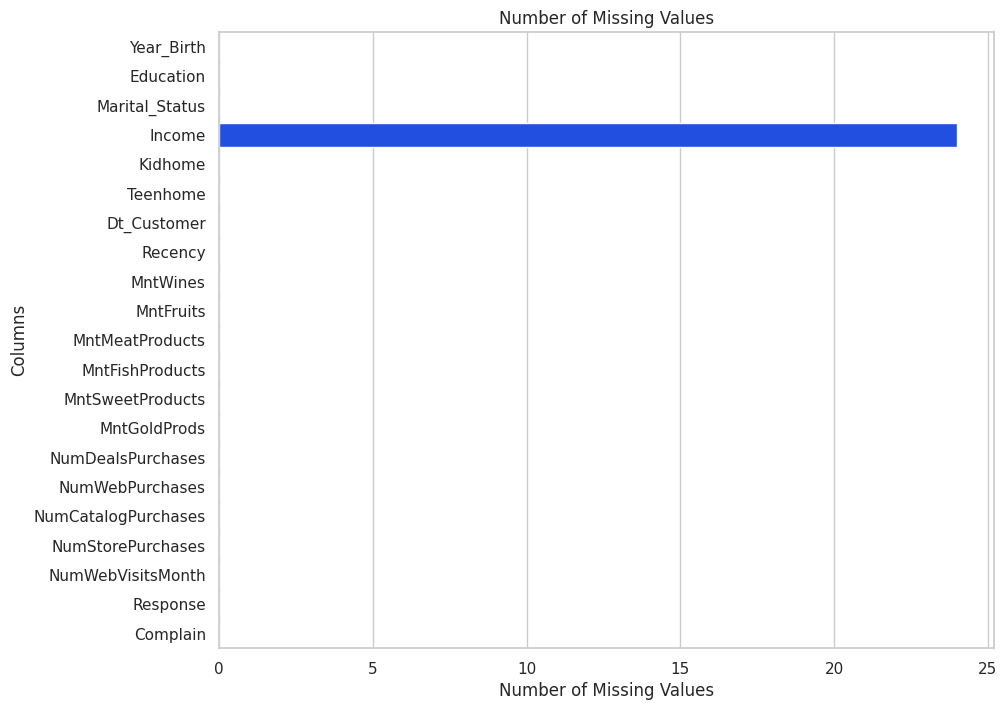

In [ ]:
sns.set(style='whitegrid', palette='bright')
null_values = df.isnull().sum().reset_index()
null_values.columns = ['Column', 'MissingValues']

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='MissingValues', y='Column', data=null_values)
plt.title('Number of Missing Values')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')


In [ ]:
df.groupby('Education')['Income'].mean().reset_index()

Education        Income
0    2n Cycle  47633.190000
1       Basic  20306.259259
2  Graduation  52720.373656
3      Master  52917.534247
4         PhD  56145.313929

<Axes: xlabel='Education', ylabel='Income'>

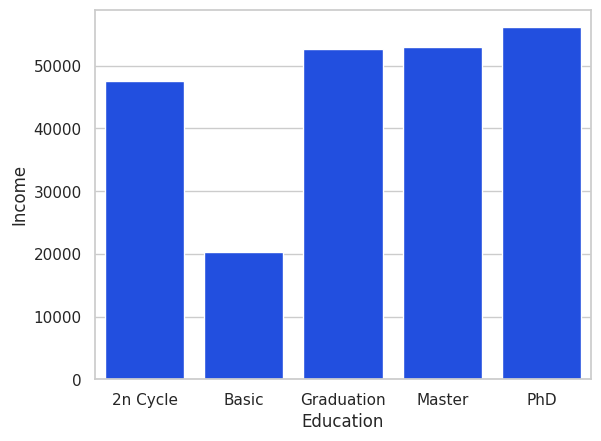

In [ ]:
income = df.groupby('Education')['Income'].mean().reset_index()

sns.barplot(income, x='Education', y = 'Income')


In [ ]:
df.isnull().sum()
mean_income_by_education = df.groupby('Education')['Income'].mean()

# Fill missing values in 'Income' with the mean income of the corresponding education level
df['Income'] = df.apply(
    lambda row: mean_income_by_education[row['Education']] if pd.isnull(row['Income']) else row['Income'],
    axis=1
)
df.isnull().sum().max()

0

**If we give promotion to customers who use 80% discount to buy every single day, we will lose money! For an annual fee 500, if a customer spend 2500 every year, we lose 2500 * 0.2 = 500, therefore 2500 is our break even price.**

2525

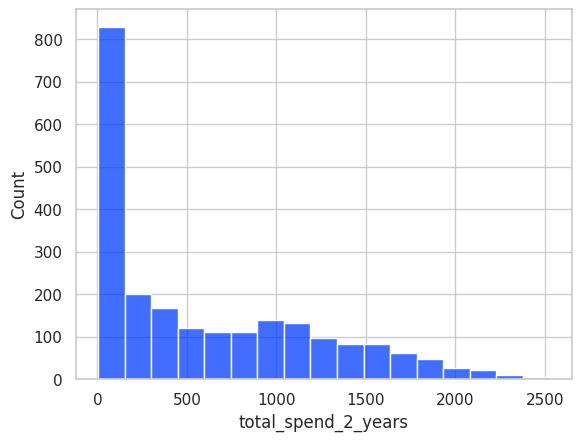

In [ ]:
sns.set(style='whitegrid', palette='bright')
df['total_spend_2_years'] = df['MntFishProducts'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntFruits']
sns.histplot(df['total_spend_2_years'])
df['total_spend_2_years'].max()

**Okay, nobody spends more than 2500, the Superstore is smart...**

In [ ]:
df['total_visits'] = df['NumDealsPurchases']+	df['NumWebPurchases']+	df['NumCatalogPurchases']+	df['NumStorePurchases']+	df['NumWebVisitsMonth']
df['average_order_items'] = df['total_spend_2_years']/(df['total_visits']+1)
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1970  Graduation       Divorced  84835.0        0         0   
1           1961  Graduation         Single  57091.0        0         0   
2           1958  Graduation        Married  67267.0        0         1   
3           1967  Graduation       Together  32474.0        1         1   
4           1989  Graduation         Single  21474.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1976         PhD       Divorced  66476.0        0         1   
2236        1977    2n Cycle        Married  31056.0        1         0   
2237        1976  Graduation       Divorced  46310.0        1         0   
2238        1978  Graduation        Married  65819.0        0         0   
2239        1969         PhD        Married  94871.0        0         2   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            2014        0       189        104              379   
1            2014        0       464          5               64   
2            2014        0       134         11               59   
3            2014        0        10          0                1   
4            2014        0         6         16               24   
...           ...      ...       ...        ...              ...   
2235         2013       99       372         18              126   
2236         2013       99         5         10               13   
2237         2012       99       185          2               88   
2238         2012       99       267         38              701   
2239         2012       99       169         24              553   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 111               189           218                  1   
1                   7                 0            37                  1   
2                  15                 2            30                  1   
3                   0                 0             0                  1   
4                  11                 0            34                  2   
...               ...               ...           ...                ...   
2235               47                48            78                  2   
2236                3                 8            16                  1   
2237               15                 5            14                  2   
2238              149               165            63                  1   
2239              188                 0           144                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   4                    4                  6   
1                   7                    3                  7   
2                   3                    2                  5   
3                   1                    0                  2   
4                   3                    1                  2   
...               ...                  ...                ...   
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   
2239                8                    5                  4   

      NumWebVisitsMonth  Response  Complain  total_spend_2_years  \
0                     1         1         0                 1190   
1                     5         1         0                  577   
2                     2         0         0                  251   
3                     7         0         0                   11   
4                     7         1         0                   91   
...                 ...       ...       ...                  ...   
2235                  4         0         0                  689   
2236                  8         0         0       

In [ ]:
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = df.select_dtypes(include=['number']).columns.tolist()
cat_features, num_features, len(num_features)

(['Education', 'Marital_Status'],
 ['Year_Birth',
  'Income',
  'Kidhome',
  'Teenhome',
  'Dt_Customer',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'Response',
  'Complain',
  'total_spend_2_years',
  'total_visits',
  'average_order_items'],
 22)

## **Univariate Analysis**

<Axes: xlabel='Education', ylabel='Count'>

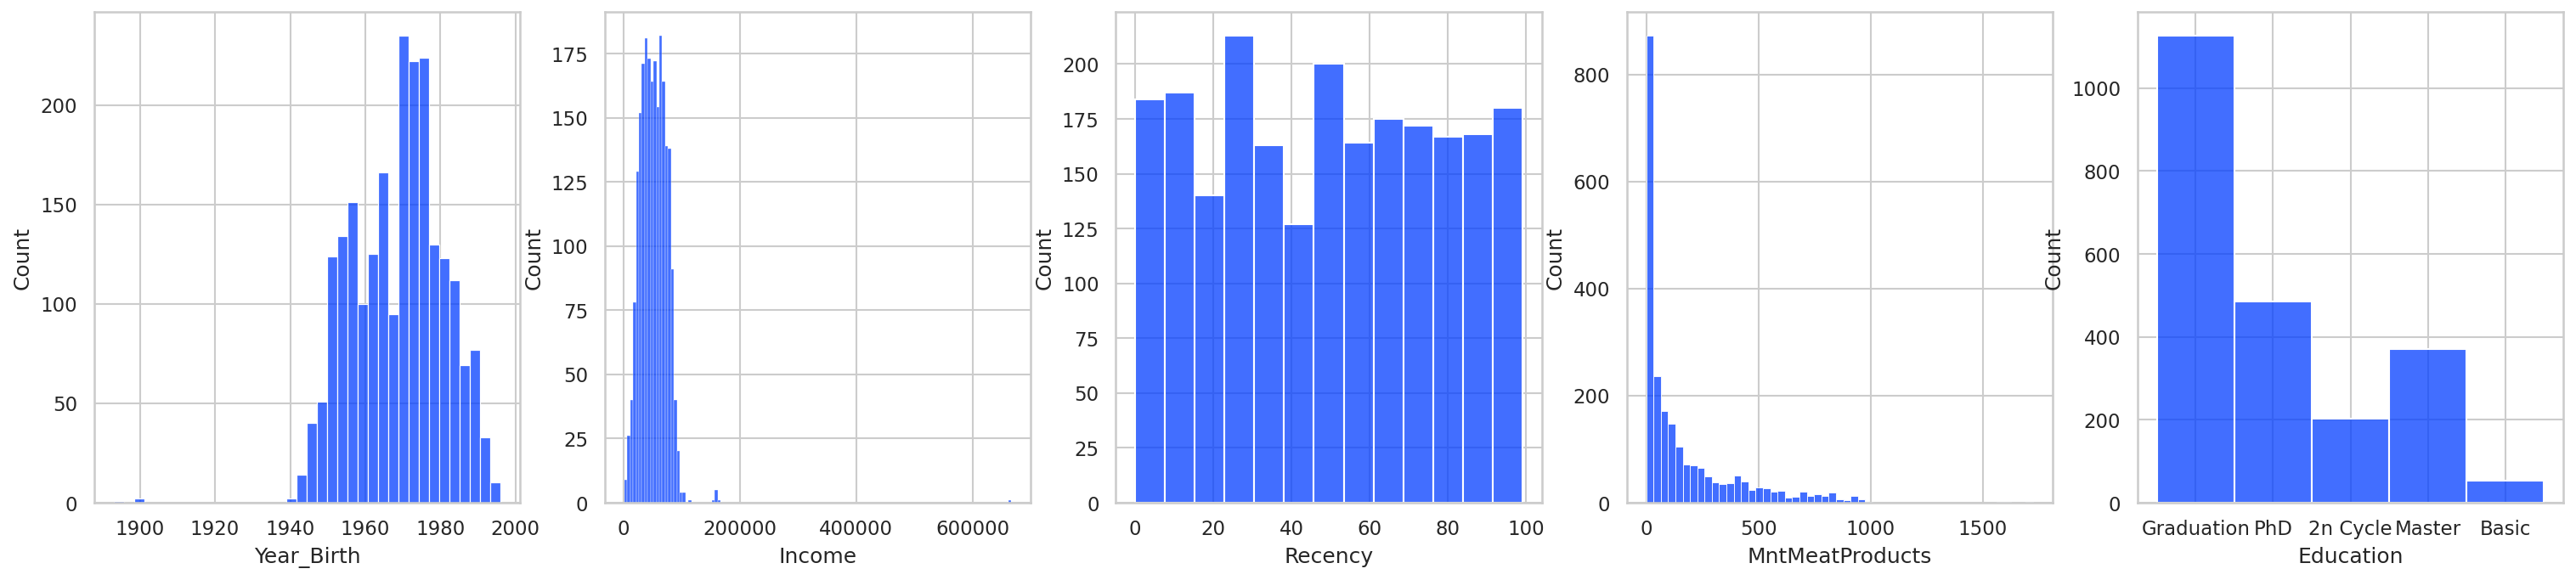

In [ ]:
sns.set(style='whitegrid', palette='bright')
fig, (ax1,ax2,ax3,ax4, ax5) = plt.subplots(1,5, figsize=(25,5), dpi=150)


sns.histplot(df['Year_Birth'], ax = ax1)
sns.histplot(df['Income'], ax = ax2)
sns.histplot(df['Recency'], ax = ax3)
sns.histplot(df['MntMeatProducts'], ax = ax4)
sns.histplot(df['Education'], ax = ax5)



In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'total_spend_2_years', 'total_visits',
       'average_order_items'],
      dtype='object')

<Axes: xlabel='NumStorePurchases', ylabel='Count'>

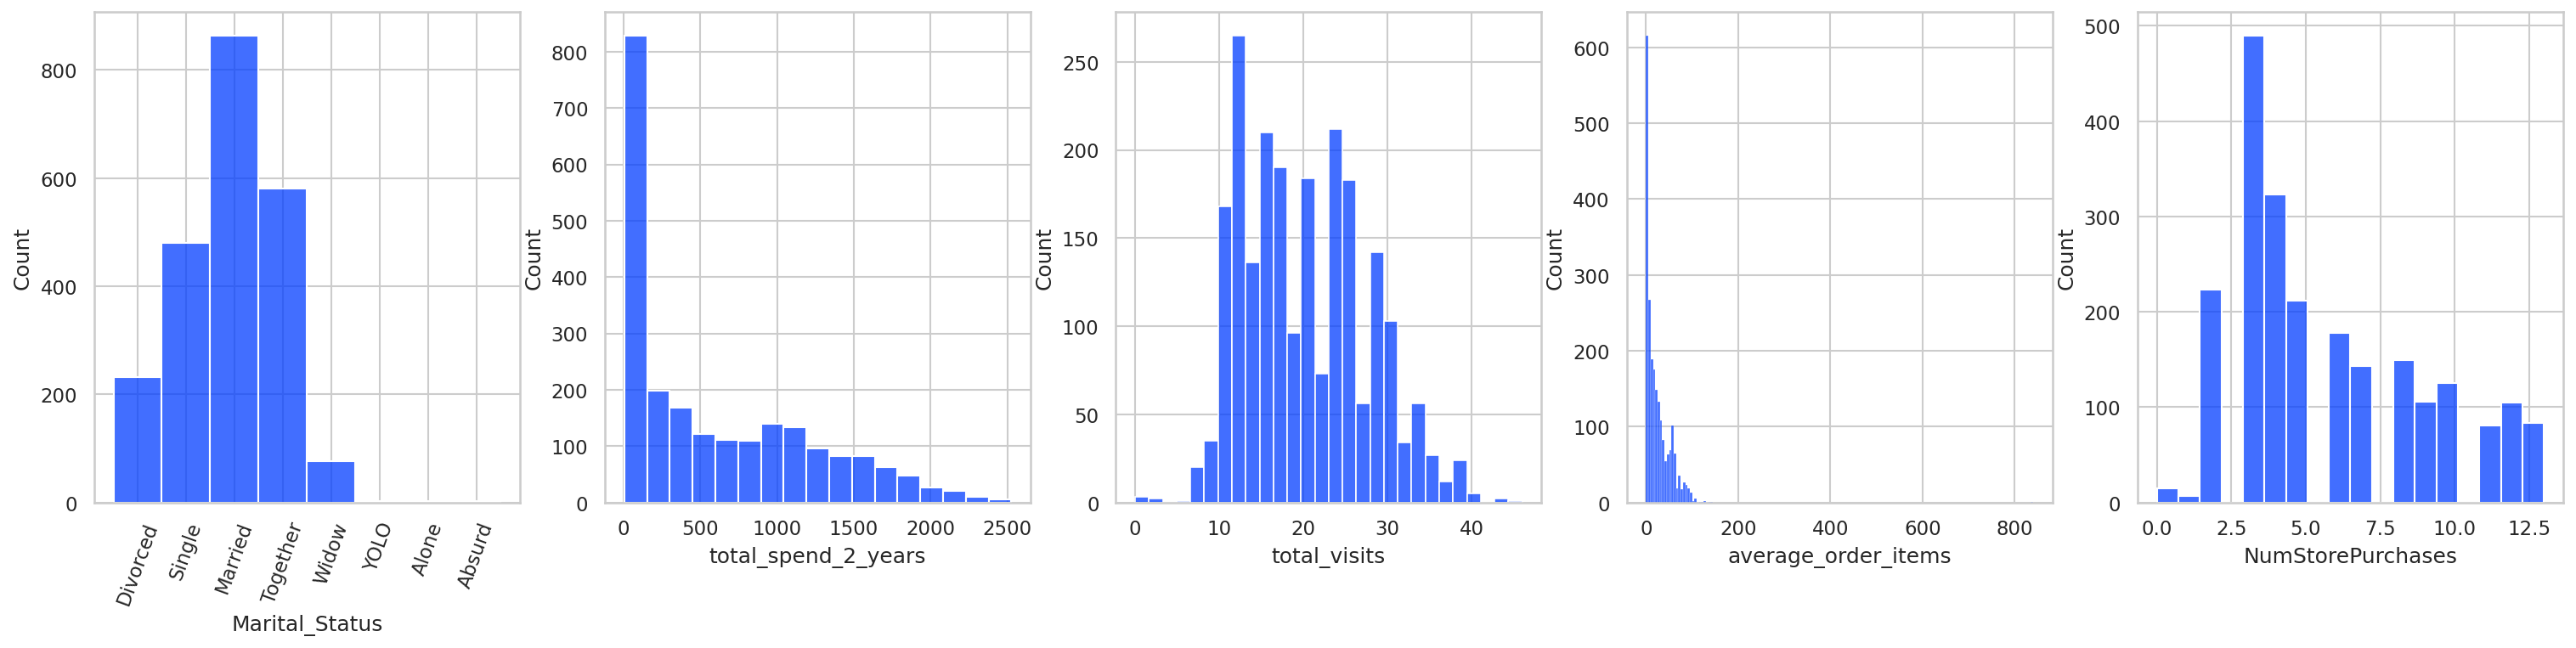

In [ ]:
sns.set(style='whitegrid', palette='bright')
fig, (ax1,ax2,ax3,ax4, ax5) = plt.subplots(1,5, figsize=(25,5), dpi=150)

sns.histplot(df['Marital_Status'], ax = ax1)
ax1.tick_params(axis='x', rotation=70)
sns.histplot(df['total_spend_2_years'], ax = ax2)
sns.histplot(df['total_visits'], ax = ax3)
sns.histplot(df['average_order_items'], ax = ax4)
sns.histplot(df['NumStorePurchases'], ax = ax5)

## **Extreme Value Handle**

0 202488.10597850854


<Axes: xlabel='Income', ylabel='Count'>

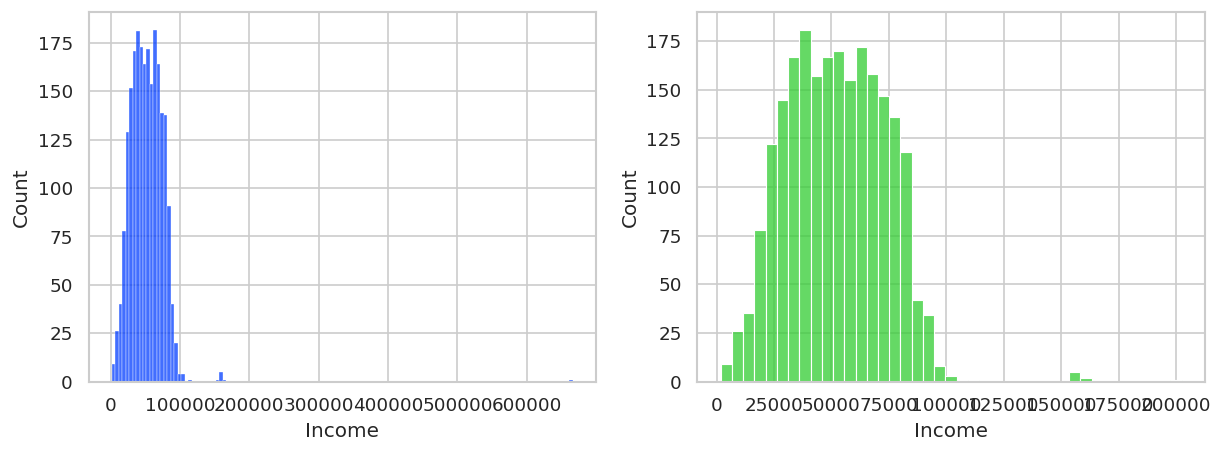

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4),dpi=120)
mean_value = df['Income'].mean()
std_dev = df['Income'].std()
sns.histplot(df['Income'], label='before clipping', ax = ax[0])
# Determine the 6-sigma range
lower_bound = 0
upper_bound = mean_value + 6 * std_dev
print(lower_bound, upper_bound)
# Clip values to 6-sigma range
df['Income'] = df['Income'].clip(lower_bound, upper_bound)
sns.histplot(df['Income'], label='after clipping', color = 'limegreen', ax = ax[1])

0 205.38542137542913


<Axes: xlabel='average_order_items', ylabel='Count'>

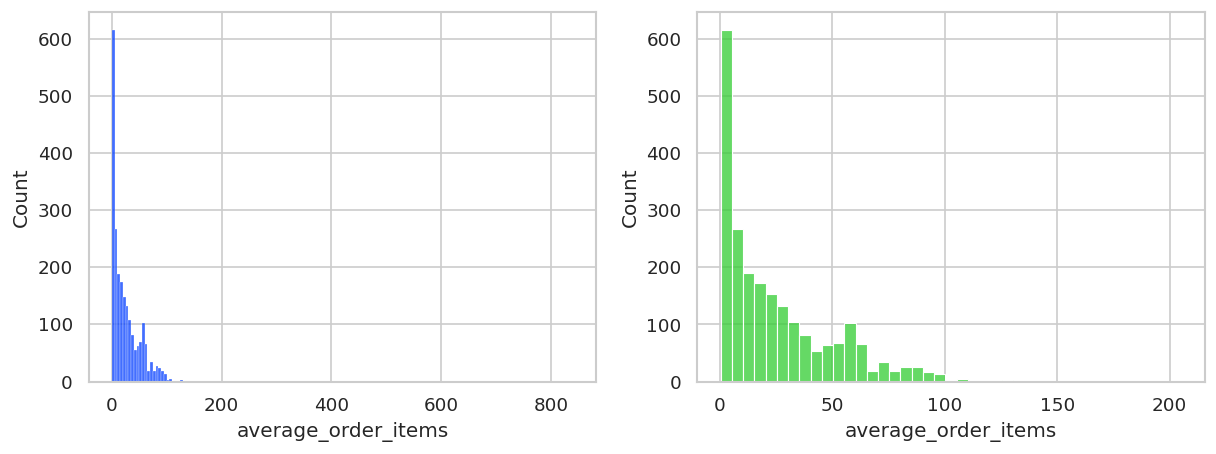

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4),dpi=120)
col = 'average_order_items'
mean_value = df[col].mean()
std_dev = df[col].std()
sns.histplot(df[col], label='before clipping', ax = ax[0])
# Determine the 6-sigma range
lower_bound = 0
upper_bound = mean_value + 6 * std_dev
print(lower_bound, upper_bound)
# Clip values to 6-sigma range
df[col] = df[col].clip(lower_bound, upper_bound)
sns.histplot(df[col], label='after clipping',color = 'limegreen', ax = ax[1])

## **Bivariate Analysis**

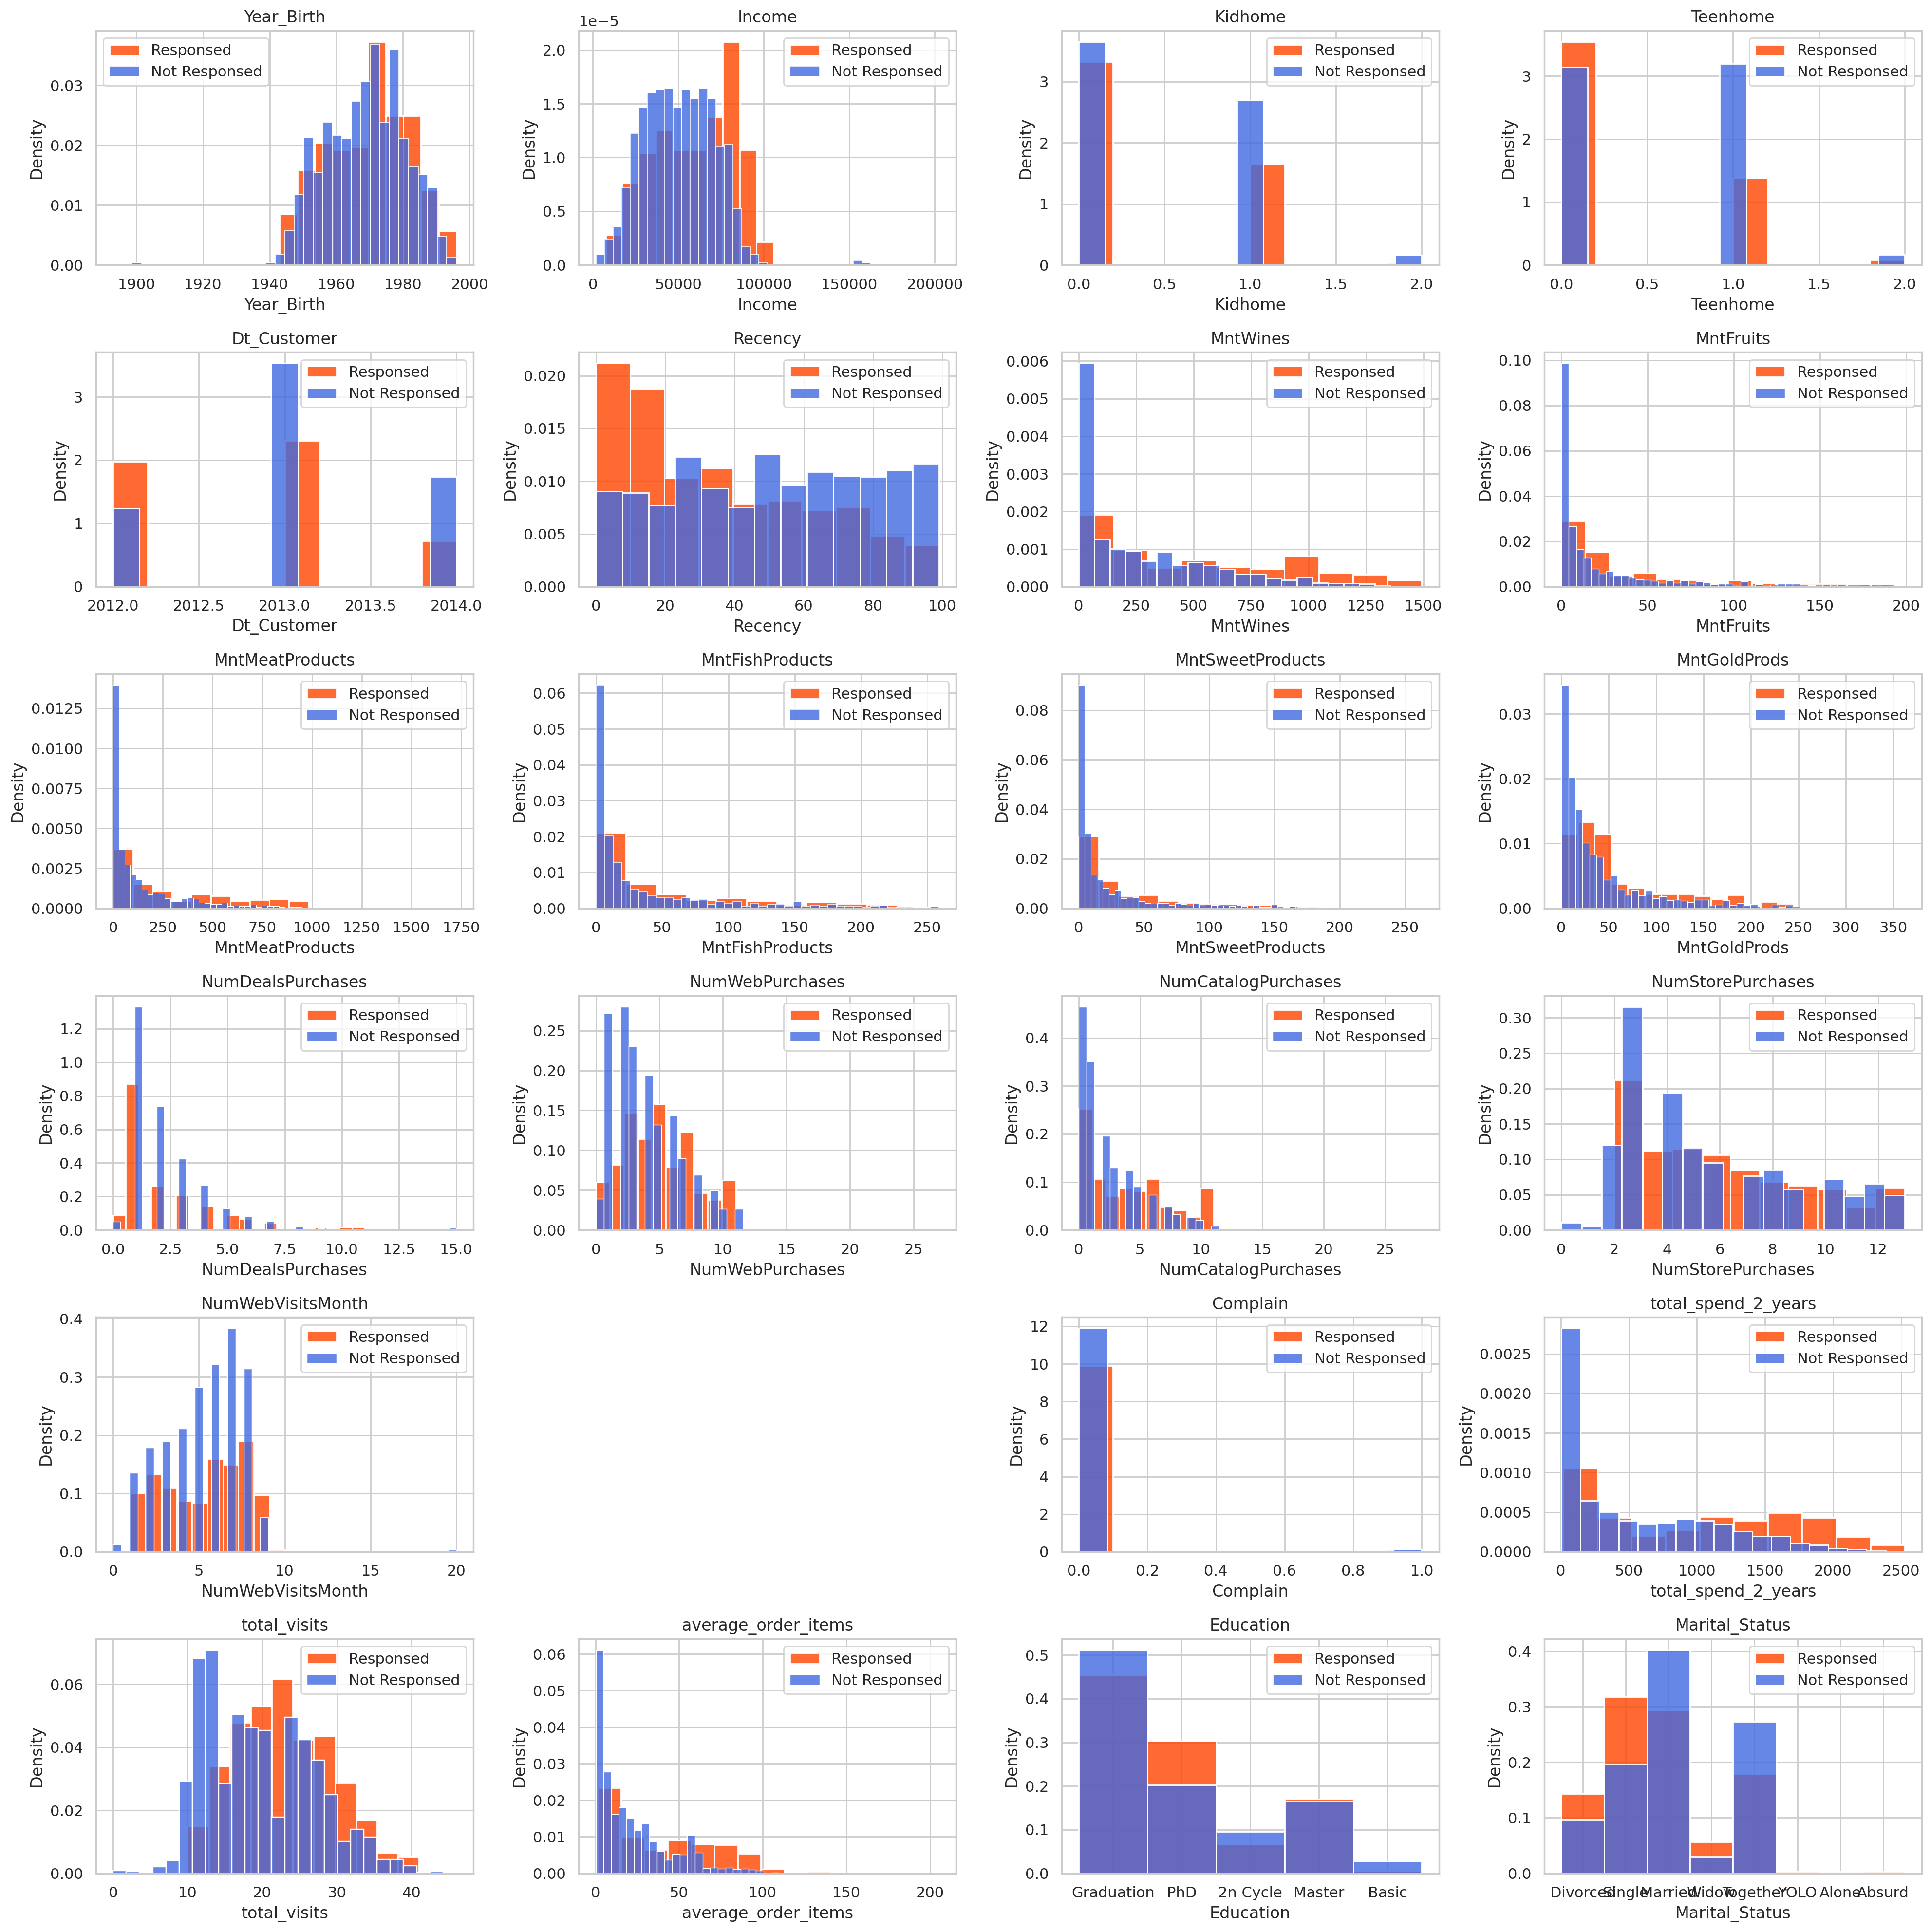

In [ ]:
df_response = df[df['Response']==1]
df_nonresponse = df[df['Response']==0]
plt.figure(figsize=(20, 20),dpi=200)

for i, col in enumerate(num_features+cat_features, 1):
    if col!='Response':
      plt.subplot(6, 4, i)
      sns.histplot(df_response[col], color="orangered", label="Responsed", stat="density",alpha=0.8)
      sns.histplot(df_nonresponse[col], color="royalblue", label="Not Responsed", stat="density" ,alpha=0.8)


      plt.legend()
      plt.title(f'{col}')

plt.tight_layout()
plt.show()


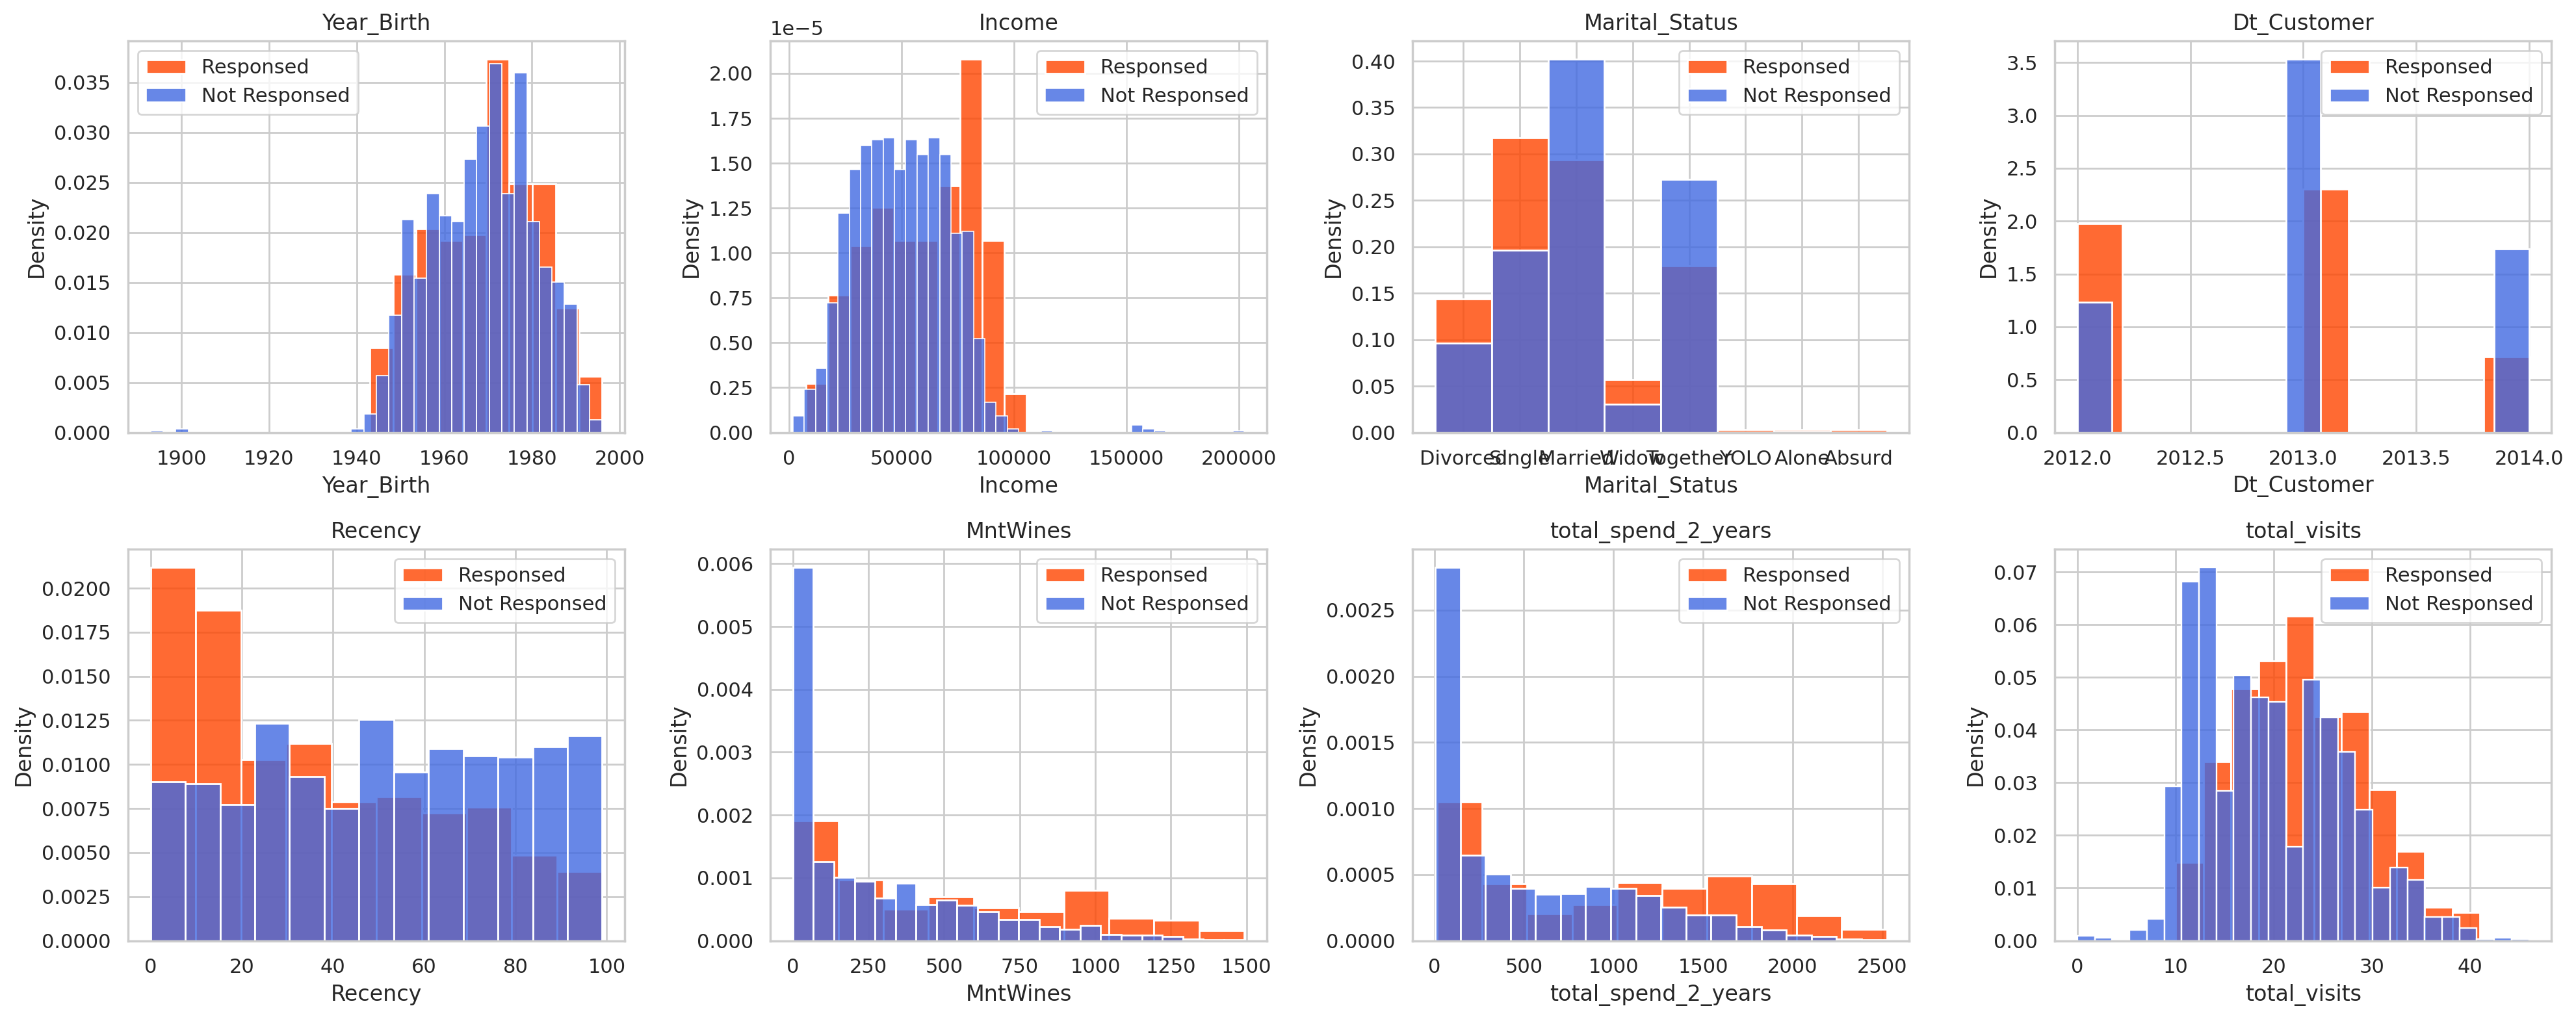

In [ ]:
df_response = df[df['Response']==1]
df_nonresponse = df[df['Response']==0]
plt.figure(figsize=(20, 8),dpi=200)

interests = ['Year_Birth', 'Income', 'Marital_Status', 'Dt_Customer', 'Recency', 'MntWines', 'total_spend_2_years', 'total_visits' ]
for i, col in enumerate(interests, 1):
    if col!='Response':
      plt.subplot(2, 4, i)
      sns.histplot(df_response[col], color="orangered", label="Responsed", stat="density",alpha=0.8)
      sns.histplot(df_nonresponse[col], color="royalblue", label="Not Responsed", stat="density" ,alpha=0.8)


      plt.legend()
      plt.title(f'{col}')

plt.tight_layout()
plt.show()


<Axes: >

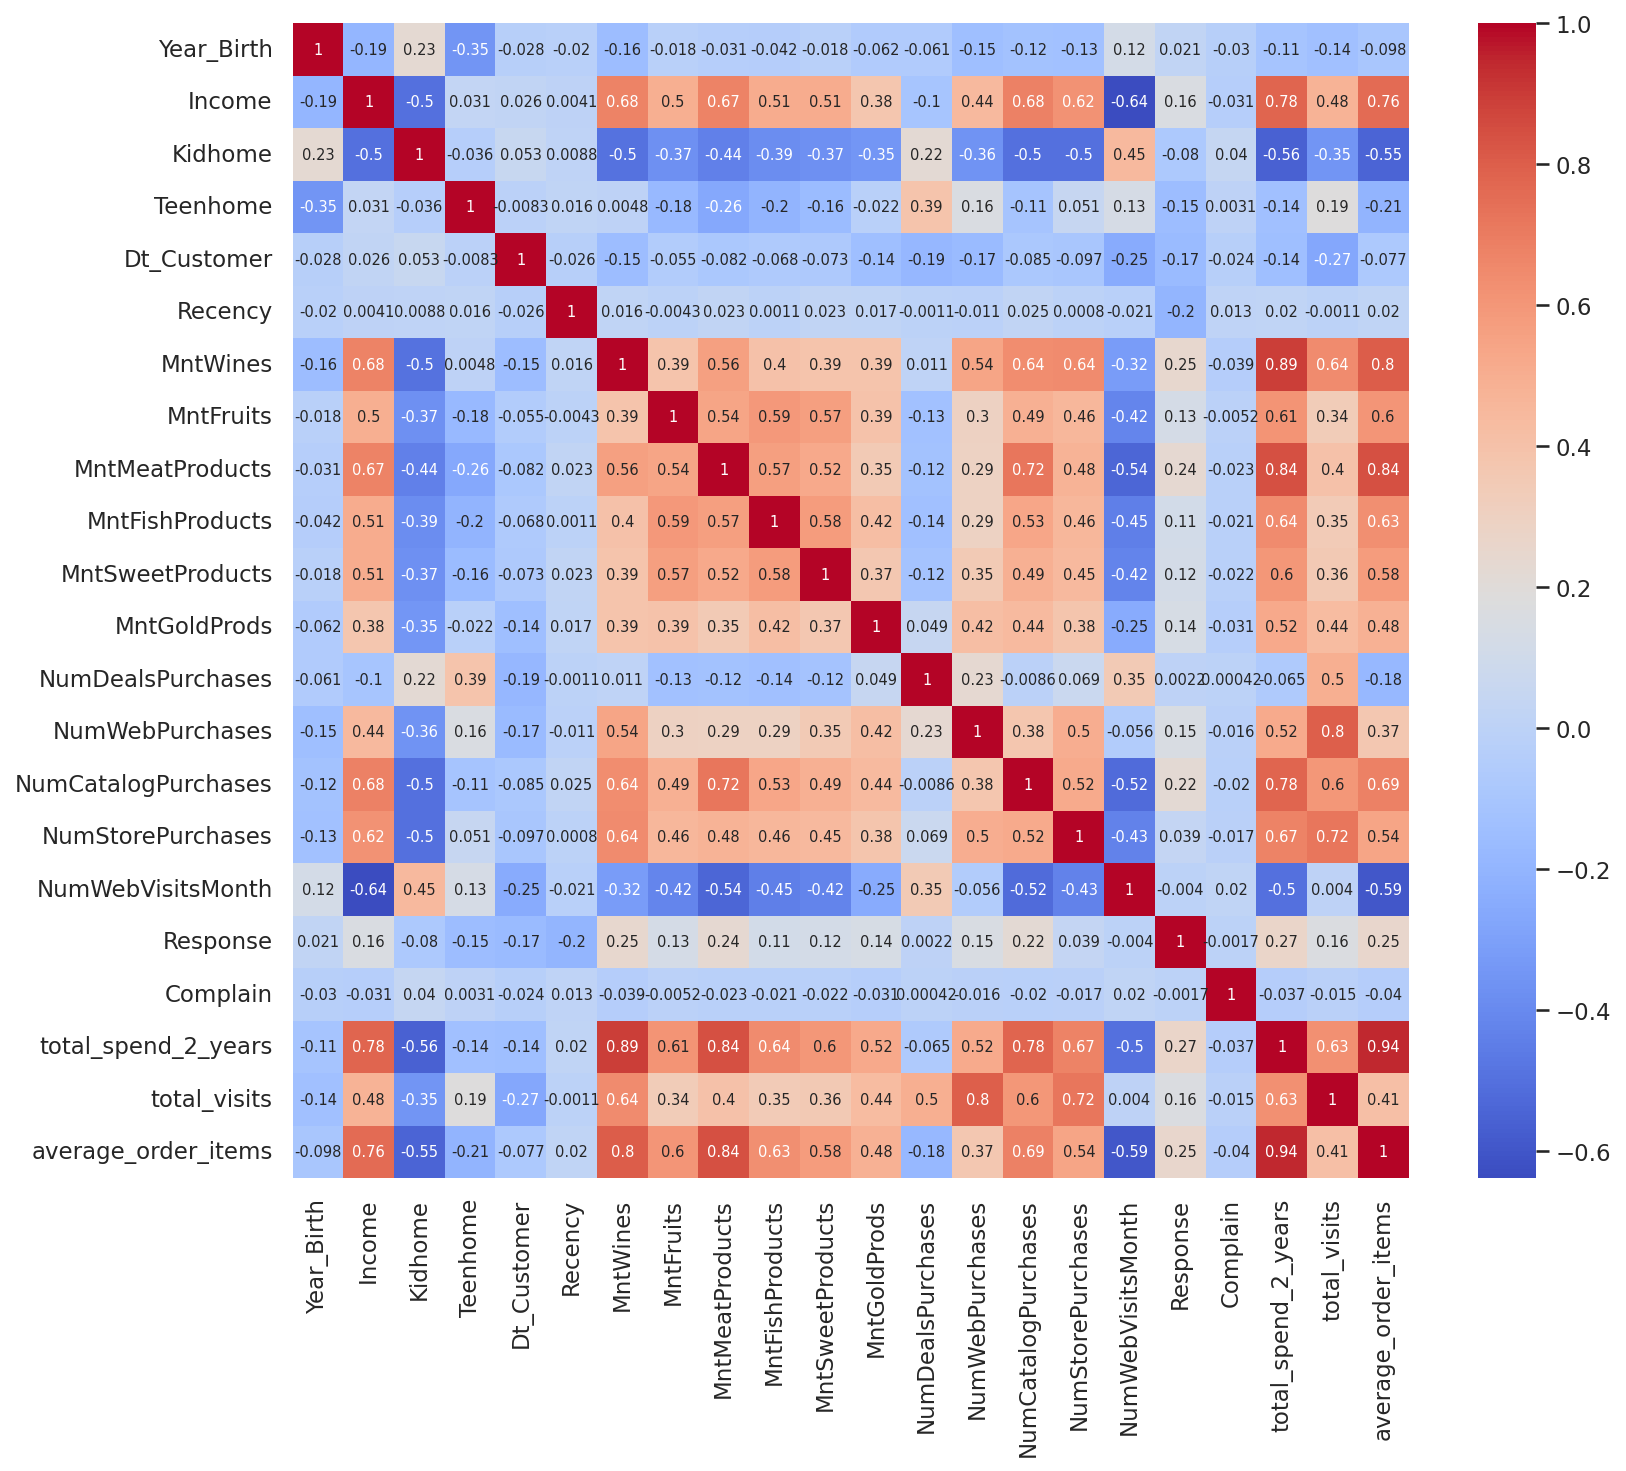

In [ ]:
plt.figure(figsize=(12,10),dpi=150)
cor = df[num_features].corr()
sns.heatmap(cor, annot=True, annot_kws={"size":7}, cmap='coolwarm')

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'total_spend_2_years', 'total_visits',
       'average_order_items'],
      dtype='object')

In [ ]:
df['Response'].unique()

array([1, 0])

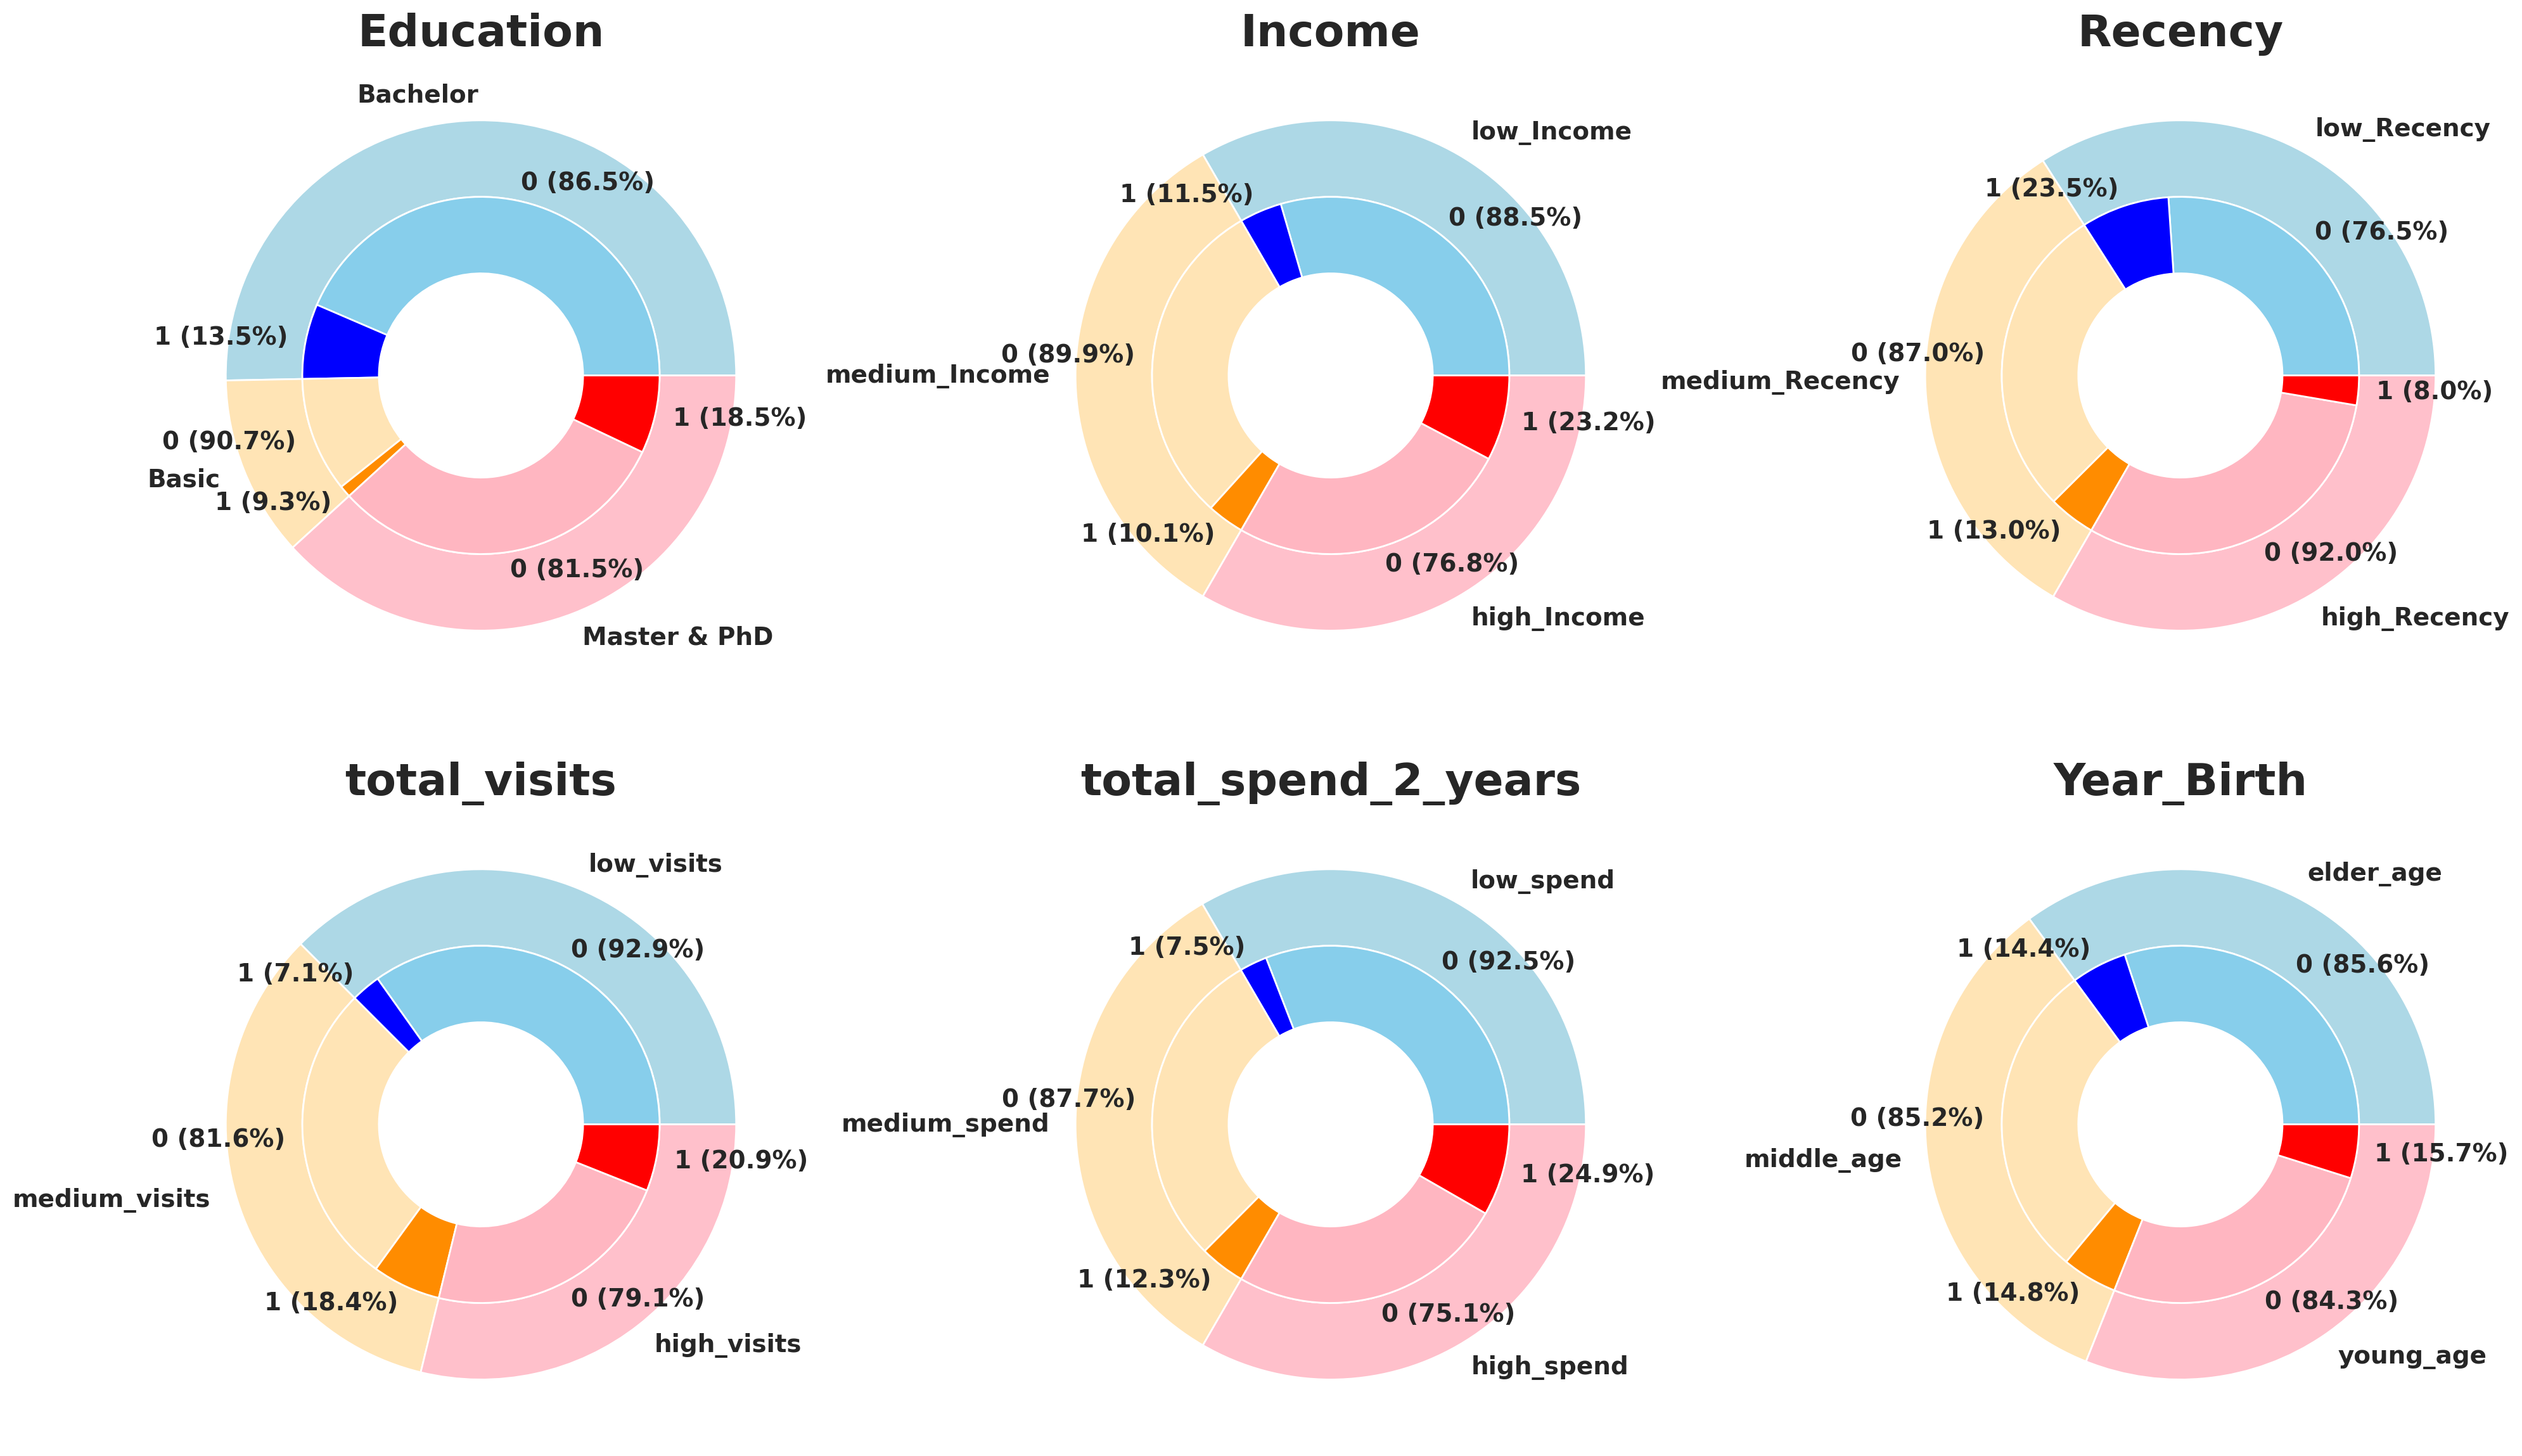

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,12), dpi=200)
ax = ax.ravel()
df_temp = df.copy()
df_temp['Income'] = pd.qcut(df_temp['Income'], q=3, labels=['low_Income', 'medium_Income', 'high_Income'])
df_temp['Recency'] = pd.qcut(df_temp['Recency'], q=3, labels=['low_Recency', 'medium_Recency', 'high_Recency'])
df_temp['total_visits'] = pd.qcut(df_temp['total_visits'], q=3, labels=['low_visits', 'medium_visits', 'high_visits'])
df_temp['total_spend_2_years'] = pd.qcut(df_temp['total_spend_2_years'], q=3, labels=['low_spend', 'medium_spend', 'high_spend'])
df_temp['Year_Birth'] = pd.qcut(df_temp['Year_Birth'], q=3, labels=['elder_age', 'middle_age', 'young_age'])
df_temp['Education'] = df_temp['Education'].apply(lambda x:"Master & PhD" if x in ['Master', 'PhD'] else('Bachelor' if x=='Graduation' else 'Basic'))
interests = ['Education', 'Income', 'Recency', 'total_visits', 'total_spend_2_years', 'Year_Birth']
colors_outer = ['lightblue','moccasin','pink']
colors_inner = [ 'skyblue', 'blue', 'moccasin','darkorange' , 'lightpink', 'red']

for i, cat in enumerate(interests):
  df_temp['Response'] = df_temp['Response'].astype(str)
  counts = df_temp.groupby([cat, 'Response']).size().reset_index(name='counts')

  category_totals = counts.groupby(cat)['counts'].sum().reset_index(name='total_counts')

  counts = counts.merge(category_totals, on=cat)

  counts['proportion'] = counts['counts'] / counts['total_counts']
  counts['labels'] = counts['Response'] + ' (' + (counts['proportion'] * 100).round(1).astype(str) + '%)'

  ax[i].pie(counts.groupby(cat)['counts'].sum(), labels=counts[cat].unique(),
        radius=1, colors=colors_outer, wedgeprops=dict(width=0.3, edgecolor='w'), textprops={'fontsize': 14, 'weight': 'bold'})

  ax[i].pie(counts['counts'], labels=counts['labels'], radius=0.7,
        colors=colors_inner, wedgeprops=dict(width=0.3, edgecolor='w'), textprops={'fontsize': 14, 'weight': 'bold'})

  ax[i].set_title(cat, fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

## **Logistic Regression Model**

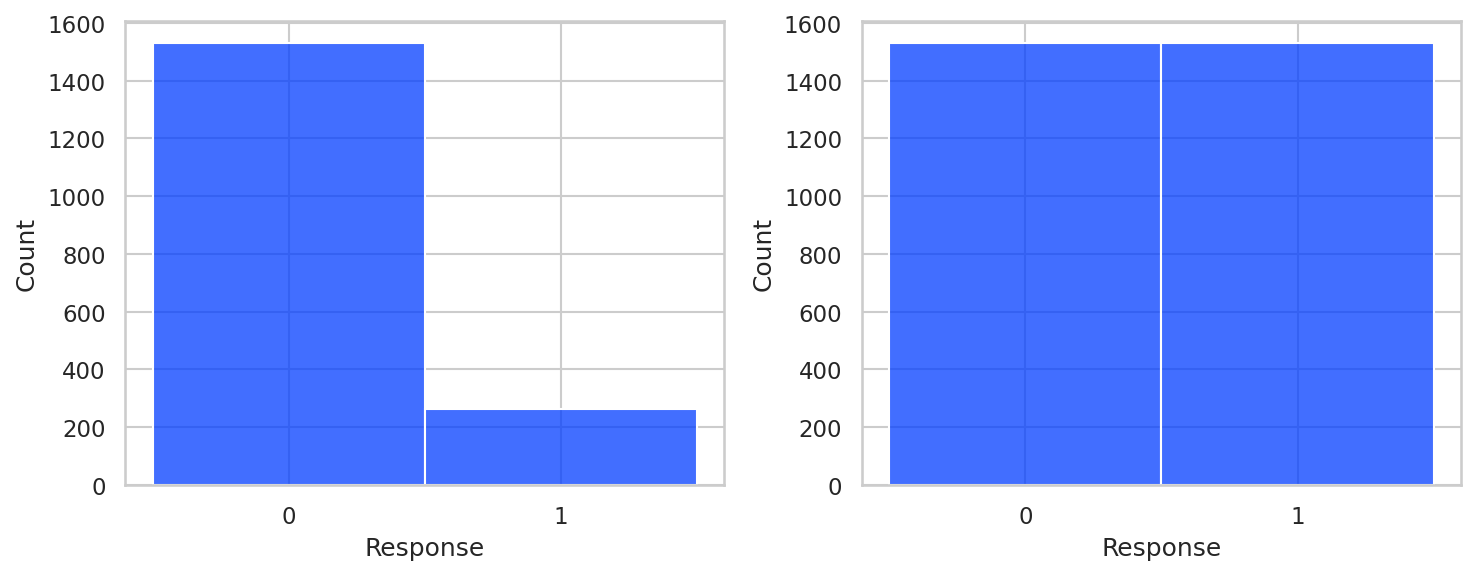

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Response')
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

X = df[numerical_features + categorical_features]
y = df['Response']

# Combining scaled numerical features and categorical features
# X_preprocessed = pd.concat((X_scaled, X[categorical_features]), axis=1)
X_preprocessed = pd.get_dummies(X, drop_first=True)

# Scaling numerical features
scaler = StandardScaler()

X_preprocessed = pd.DataFrame(X_preprocessed, columns = X_preprocessed.columns)


X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = X_preprocessed.columns)
X_test = pd.DataFrame(X_test, columns = X_preprocessed.columns)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4), dpi=150)
sns.histplot(y_train.astype(str), ax= ax1)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=40)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train.shape, y_train.value_counts()

sns.histplot(y_train.astype(str), ax= ax2)
plt.tight_layout()
plt.show()

In [ ]:
model = sm.Logit(y_train, X_train.astype(float))
result = model.fit(maxiter=500)
result.summary()


         Current function value: 0.501640
         Iterations: 500


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 3060
Model:                          Logit   Df Residuals:                     3031
Method:                           MLE   Df Model:                           28
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.2763
Time:                        22:45:02   Log-Likelihood:                -1535.0
converged:                      False   LL-Null:                       -2121.0
Covariance Type:            nonrobust   LLR p-value:                4.974e-229
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year_Birth                  0.0368      0.055      0.669      0.504      -0.071       0.145
Income                      0.0182      0.106      0.171      0.865      -0.190       0.227
Kidhome                     0.0896      0.072      1.238      0.216      -0.052       0.231
Teenhome                   -0.4797      0.067     -7.208      0.000      -0.610      -0.349
Recency                    -0.6449      0.047    -13.714      0.000      -0.737      -0.553
MntWines                    0.1594   1.35e+06   1.18e-07      1.000   -2.65e+06    2.65e+06
MntFruits                  -0.0082   1.61e+05  -5.09e-08      1.000   -3.15e+05    3.15e+05
MntMeatProducts             0.1950   9.15e+05   2.13e-07      1.000   -1.79e+06    1.79e+06
MntFishProducts            -0.1525   2.26e+05  -6.73e-07      1.000   -4.44e+05    4.44e+05
MntSweetProducts           -0.0367   1.66e+05  -2.21e-07      1.000   -3.26e+05    3.26e+05
MntGoldProds                0.1151    2.1e+05   5.49e-07      1.000   -4.11e+05    4.11e+05
NumDealsPurchases           0.2187   9.13e+05    2.4e-07      1.000   -1.79e+06    1.79e+06
NumWebPurchases             0.1868   1.29e+06   1.45e-07      1.000   -2.53e+06    2.53e+06
NumCatalogPurchases         0.3235   1.39e+06   2.33e-07      1.000   -2.72e+06    2.72e+06
NumStorePurchases          -0.6325   1.52e+06  -4.16e-07      1.000   -2.98e+06    2.98e+06
NumWebVisitsMonth           0.5544   1.13e+06    4.9e-07      1.000   -2.22e+06    2.22e+06
Complain                    0.0152      0.049      0.309      0.757      -0.081       0.112
total_spend_2_years         0.1551   2.43e+06   6.39e-08      1.000   -4.76e+06    4.76e+06
total_visits                0.1622   3.43e+06   4.73e-08      1.000   -6.73e+06    6.73e+06
average_order_items         0.5497      0.266      2.067      0.039       0.028       1.071
Education_Basic            -0.1534      0.063     -2.448      0.014      -0.276      -0.031
Education_Graduation        0.0857      0.089      0.960      0.337      -0.089       0.261
Education_Master            0.1275      0.076      1.686      0.092      -0.021       0.276
Education_PhD               0.3204      0.082      3.921      0.000       0.160       0.481
Marital_Status_Alone       -0.0767      0.084     -0.914      0.361      -0.241       0.088
Marital_Status_Divorced    -0.6592      0.526     -1.253      0.210      -1.690       0.372
Marital_Status_Married     -1.3374      0.820     -1.631      0.103      -2.945       0.270
Marital_Status_Single      -0.8046      0.689     -1.168      0.243      -2.155       0.545
Marital_Status_Together    -1.3192      0.746     -1.768      0.077      -2.782       0.143
Marital_Status_Widow       -0.3510      0.319     -1.100      0.271      -0.977       0.275
Marital_Status_YOLO        -0.0655      0.080     -0.818      0.413      -0.222       0.091
===========================================================================================
"""

In [ ]:
y_pred_train = result.predict(np.array(X_train, dtype=np.float32))
y_pred_test = result.predict(np.array(X_test, dtype=np.float32))


In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

# Calculate AUC
auc_train = auc(fpr_train, tpr_train)
print("Train AUC:", auc_train)

Train AUC: 0.8758468964928019


In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)

# Calculate AUC
auc_test = auc(fpr_test, tpr_test)
print("Test AUC:", auc_test)


Test AUC: 0.8236369680851063


In [ ]:
from sklearn.metrics import classification_report

report_train = classification_report(y_train, y_pred_train>=0.5)
report_test = classification_report(y_test, y_pred_test>=0.5)

print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.92      0.61      0.74      1530
           1       0.71      0.95      0.81      1530

    accuracy                           0.78      3060
   macro avg       0.82      0.78      0.77      3060
weighted avg       0.82      0.78      0.77      3060

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71       376
           1       0.28      0.90      0.43        72

    accuracy                           0.61       448
   macro avg       0.62      0.73      0.57       448
weighted avg       0.86      0.61      0.66       448



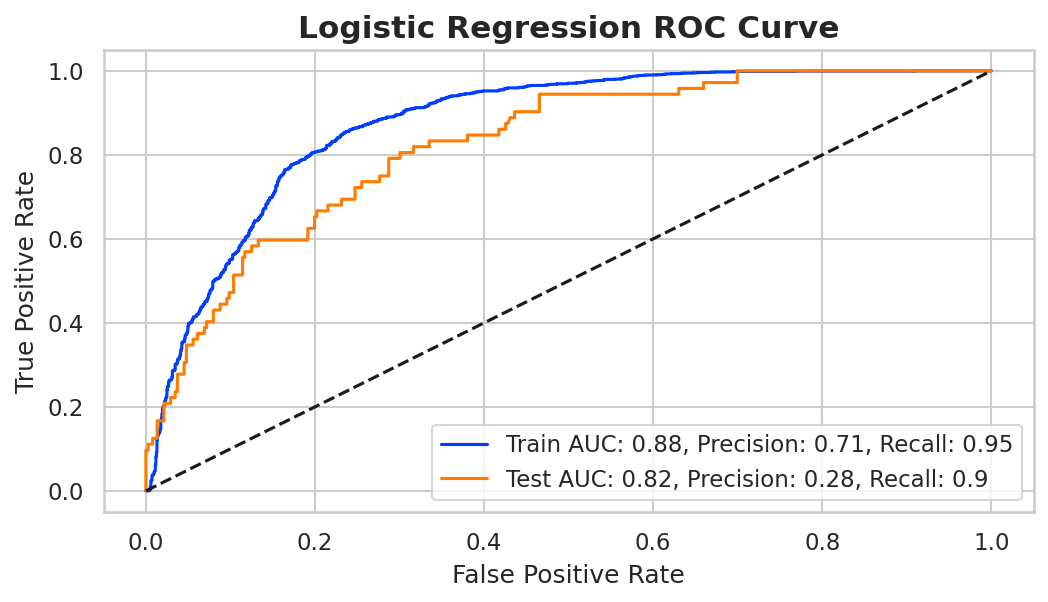

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, recall_score, roc_auc_score, precision_score

plt.figure(figsize=(8, 4), dpi=150)
plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.2f}, Precision: {round(precision_score(y_train, y_pred_train>=0.5),2)}, Recall: {round(recall_score(y_train, y_pred_train>=0.5),2)}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.2f}, Precision: {round(precision_score(y_test, y_pred_test>=0.5),2)}, Recall: {round(recall_score(y_test, y_pred_test>=0.5),2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontweight='bold', fontsize=15)
plt.legend()
plt.show()


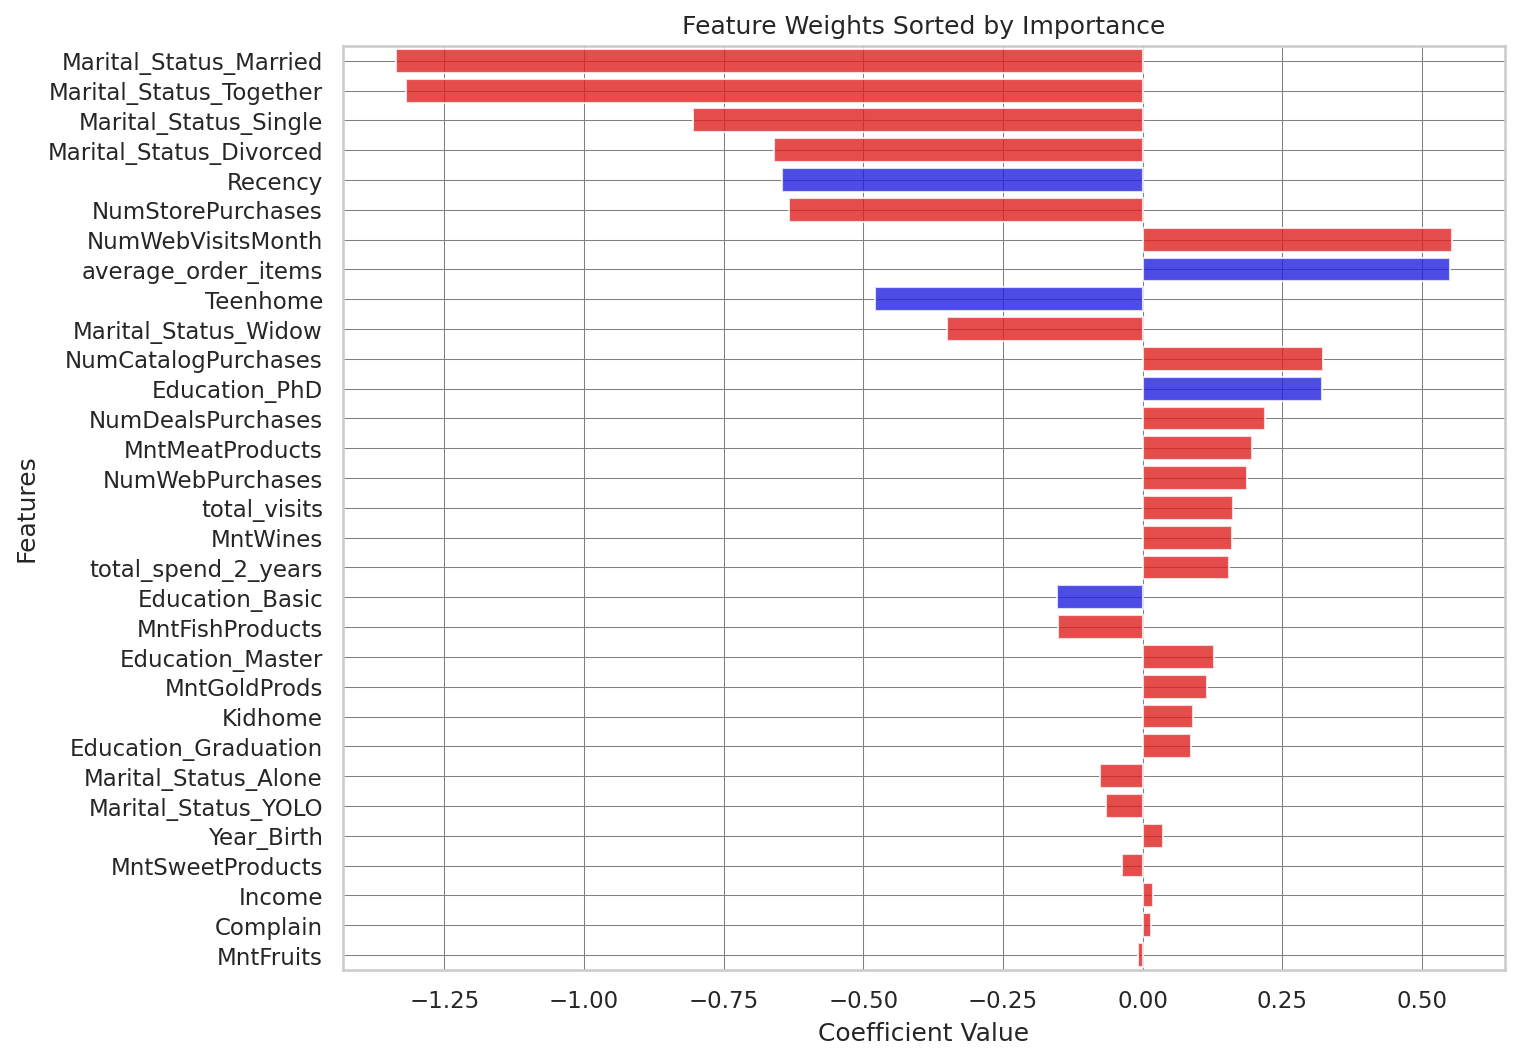

In [ ]:
coefficients = result.params
p_values = result.pvalues

coef_df = pd.DataFrame({'Coefficient': coefficients, 'P-value': p_values})
coef_df = coef_df[~coef_df.index.isin(['const'])]
coef_df_sorted = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Assign colors based on p-value significance
coef_df_sorted['Color'] = np.where(coef_df_sorted['P-value'] <= 0.05, 'blue', 'red')
# display(coef_df_sorted)

plt.figure(figsize=(10, 8),dpi=150)
sns.barplot(x='Coefficient', y=coef_df_sorted.index, data=coef_df_sorted, palette=coef_df_sorted['Color'].tolist(), alpha=0.8)

# Adding grid lines
plt.grid(True, which='both', axis='x', color='gray', linestyle='-', linewidth=0.5)
plt.grid(True, which='both', axis='y', color='gray', linestyle='-', linewidth=0.5)
plt.title('Feature Weights Sorted by Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


## **XGBoost Model**

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['Id', 'Response'])]
y = df['Response']

X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, y_train.value_counts()

((1792, 32),
 Response
 0    1530
 1     262
 Name: count, dtype: int64)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, y_train.value_counts()

((3060, 32),
 Response
 0    1530
 1    1530
 Name: count, dtype: int64)

In [ ]:
param = {
    'max_depth': 5,  # Depths from 3 to 9, control overfitting
    'n_estimators': 10,  # Number of boosting rounds, balance between speed and accuracy
    'learning_rate': 0.05,  # Makes the model more robust by shrinking the weights on each step
    'subsample': 0.8,  # Subsample ratio of the training instances, prevents overfitting
    'colsample_bytree': 0.6,  # Subsample ratio of columns when constructing each tree, for diversity
    'min_child_weight': 5,  # Minimum sum of instance weight (hessian) needed in a child, controls overfitting
    'gamma': 0.1,  # Minimum loss reduction required to make a further partition on a leaf node, controls overfitting
    'reg_alpha': 0.5,  # L1 regularization term on weights, increases model sparsity
    'reg_lambda': 0.5,  # L2 regularization term on weights, combats overfitting
}


In [ ]:
model = XGBClassifier().fit(X_train, y_train)
from sklearn.metrics import classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1530
           1       0.99      1.00      1.00      1530

    accuracy                           1.00      3060
   macro avg       1.00      1.00      1.00      3060
weighted avg       1.00      1.00      1.00      3060

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       376
           1       0.56      0.57      0.57        72

    accuracy                           0.86       448
   macro avg       0.74      0.74      0.74       448
weighted avg       0.86      0.86      0.86       448



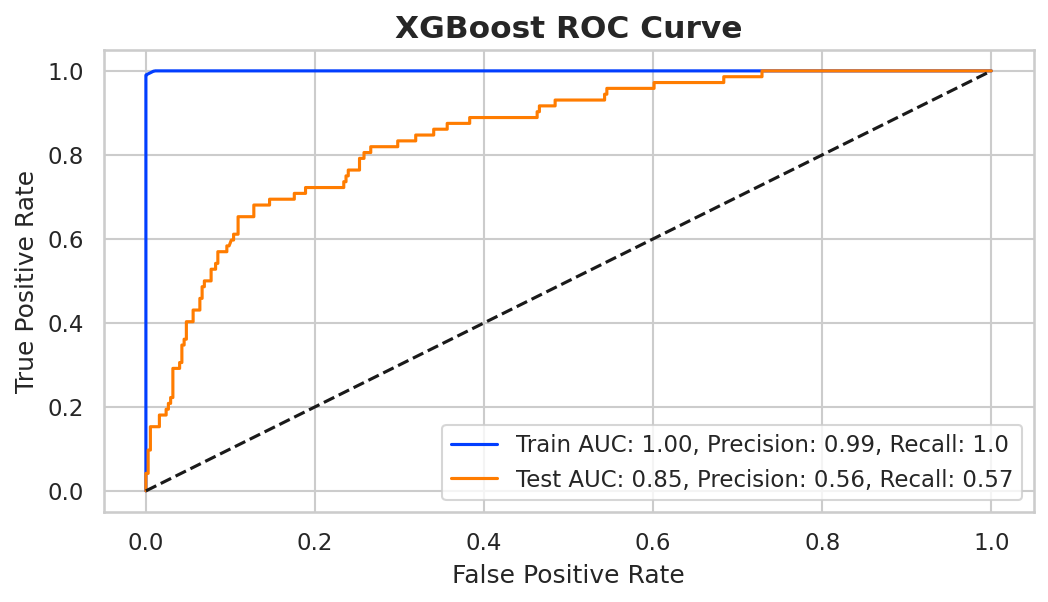

In [ ]:
from sklearn.metrics import roc_curve, auc, recall_score, roc_auc_score, precision_score
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 4), dpi=150)
plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.2f}, Precision: {round(precision_score(y_train, y_train_pred),2)}, Recall: {round(recall_score(y_train, y_train_pred),2)}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.2f}, Precision: {round(precision_score(y_test, y_test_pred),2)}, Recall: {round(recall_score(y_test, y_test_pred),2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve' , fontweight='bold', fontsize=15)
plt.legend()
plt.show()

 98%|===================| 2999/3060 [00:26<00:00]       

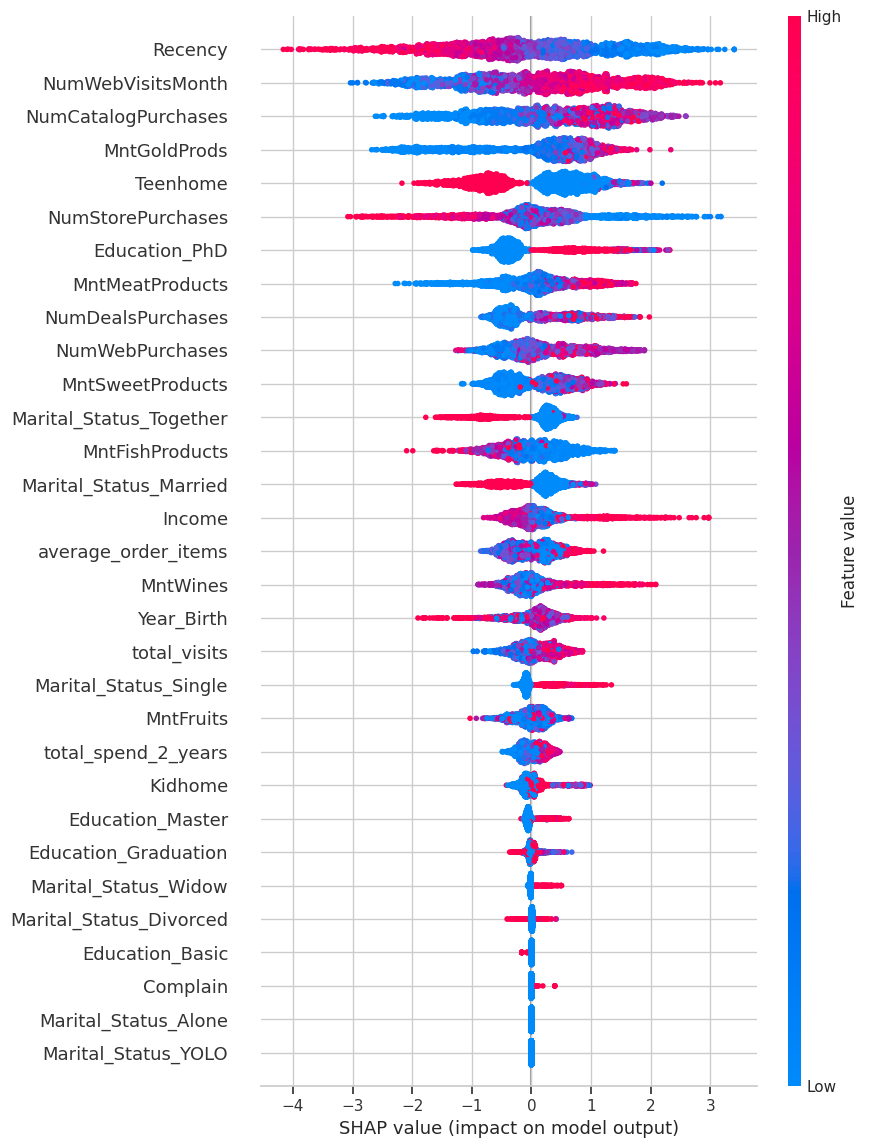

In [ ]:
import shap

explainer = shap.Explainer(model, X_train.astype(float))
shap_values = explainer(X_train.astype(float))
shap.plots.beeswarm(shap_values, max_display=X_train.shape[1])

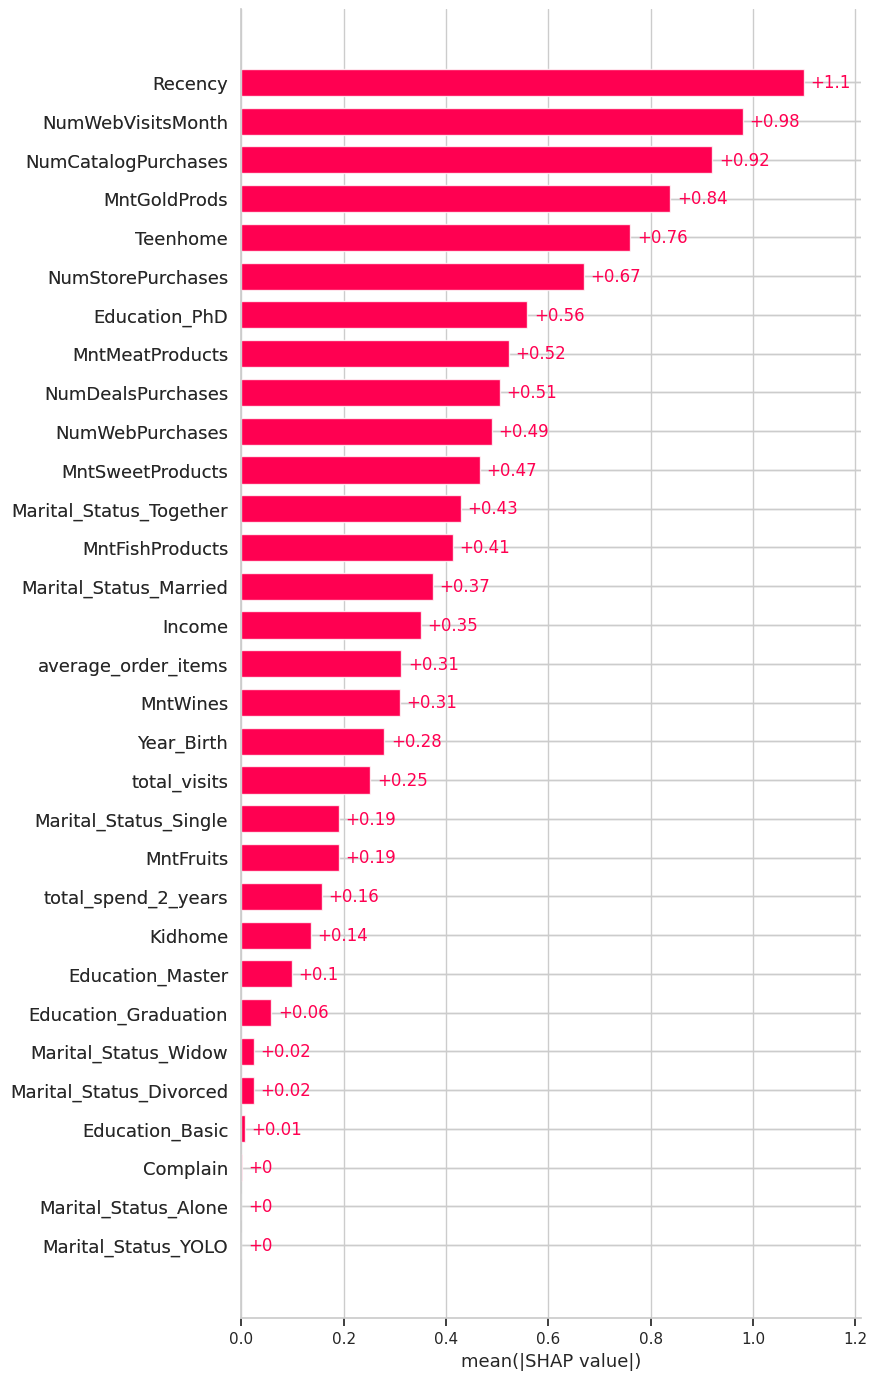

In [ ]:

shap.plots.bar(shap_values, max_display=X_train.shape[1])

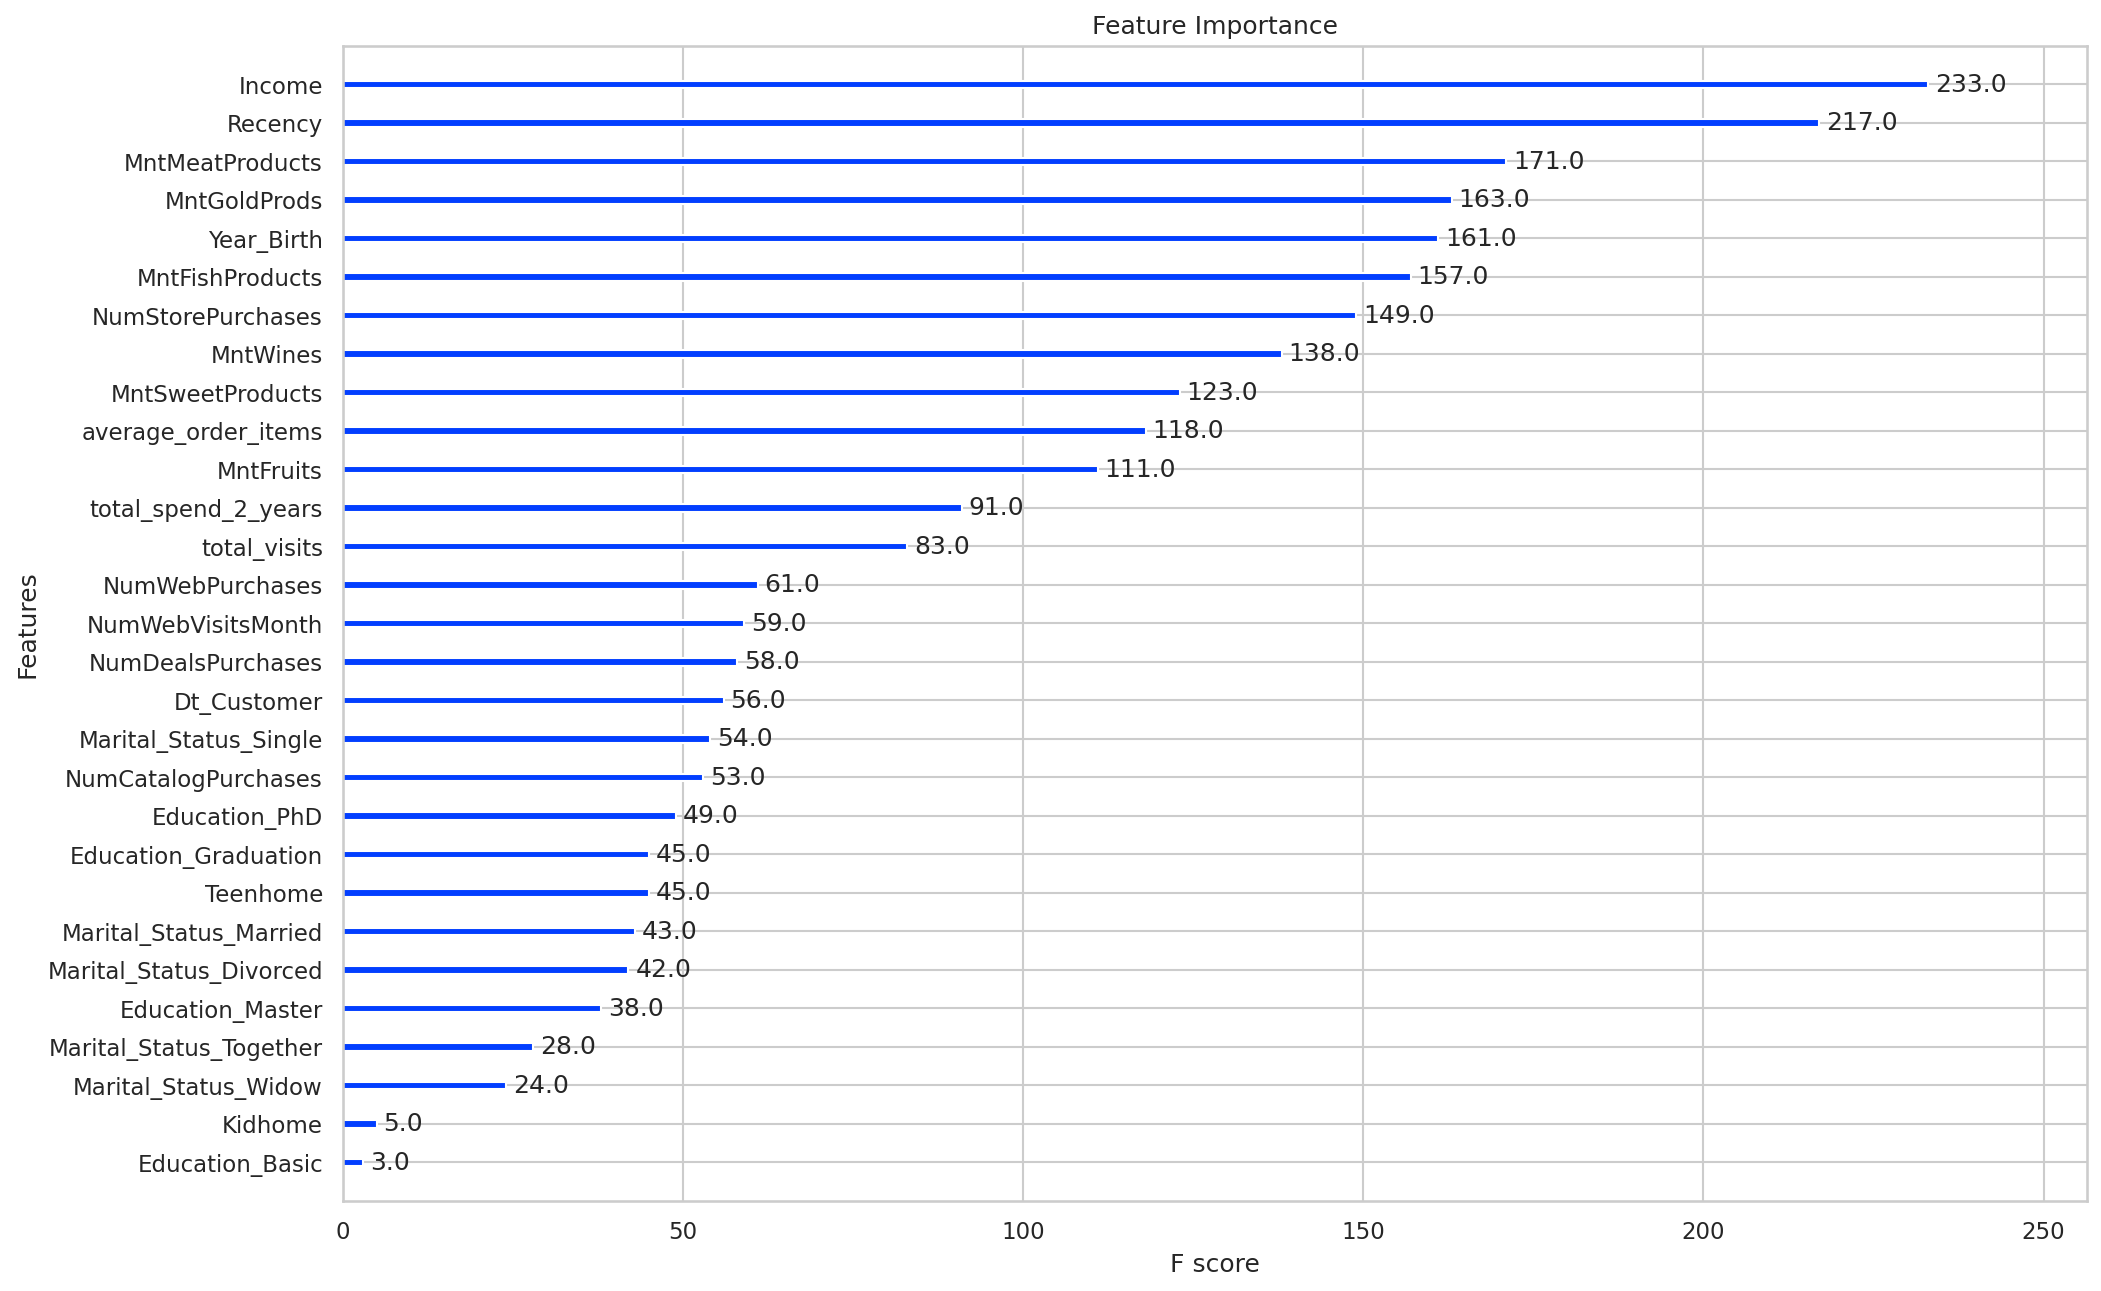

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(15, 10), dpi=150)
plot_importance(model, importance_type='weight', title='Feature Importance', ax=ax)
plt.show()

## **Grid Search AUC**

In [ ]:
param_space = {
    'max_depth': np.arange(3, 10),  # Depths from 3 to 9, control overfitting
    'n_estimators': [10, 15, 20, 30, 40, 50],  # Number of boosting rounds, balance between speed and accuracy
    'learning_rate': np.linspace(0.05, 0.3, 10),  # Makes the model more robust by shrinking the weights on each step
    'subsample': np.linspace(0.5, .9, 5),  # Subsample ratio of the training instances, prevents overfitting
    'colsample_bytree': np.linspace(0.5, .9, 5),  # Subsample ratio of columns when constructing each tree, for diversity
    'min_child_weight': [1, 2, 3, 4, 5],  # Minimum sum of instance weight (hessian) needed in a child, controls overfitting
    'gamma': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],  # Minimum loss reduction required to make a further partition on a leaf node, controls overfitting
    'reg_alpha': [0.1, 0.3, 0.5, 1],  # L1 regularization term on weights, increases model sparsity
    'reg_lambda': [0.1, 0.3, 0.5, 1],  # L2 regularization term on weights, combats overfitting
}


In [ ]:
import random

n_combinations = 200
# Function to randomly sample a combination of hyperparameters
def random_combination(param_space, n_combinations):
    combinations = []
    for _ in range(n_combinations):
        params = {key: random.choice(value) for key, value in param_space.items()}
        combinations.append(params)
    return combinations

random_combos = random_combination(param_space, n_combinations)


In [ ]:
from sklearn.metrics import recall_score, roc_auc_score, precision_score
from tqdm.auto import tqdm

best_auc = float("-inf")
best_params = None

for params in tqdm(random_combos, desc="Random searching..."):
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    # For AUC, we typically need probability scores of the positive class instead of the binary predictions.
    # Thus, we use predict_proba and take the second column (index 1) which corresponds to the probability of the positive class.
    proba_predictions = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, proba_predictions)
    print(auc, params)

    if auc > best_auc:
        best_auc = auc
        best_params = params

print("Best AUC:", best_auc)
print("Best parameters:", best_params)


Random searching...:   0%|          | 0/200 [00:00<?, ?it/s]

0.8383385047281324 {'max_depth': 6, 'n_estimators': 30, 'learning_rate': 0.2722222222222222, 'subsample': 0.7, 'colsample_bytree': 0.8, 'min_child_weight': 1, 'gamma': 0.2, 'reg_alpha': 0.1, 'reg_lambda': 0.3}
0.8384862588652482 {'max_depth': 9, 'n_estimators': 15, 'learning_rate': 0.13333333333333333, 'subsample': 0.5, 'colsample_bytree': 0.5, 'min_child_weight': 4, 'gamma': 0.4, 'reg_alpha': 0.1, 'reg_lambda': 0.3}
0.8468343676122931 {'max_depth': 6, 'n_estimators': 50, 'learning_rate': 0.21666666666666667, 'subsample': 0.9, 'colsample_bytree': 0.7, 'min_child_weight': 3, 'gamma': 0.2, 'reg_alpha': 0.1, 'reg_lambda': 1}
0.8364177009456266 {'max_depth': 6, 'n_estimators': 20, 'learning_rate': 0.2444444444444444, 'subsample': 0.7, 'colsample_bytree': 0.6, 'min_child_weight': 1, 'gamma': 0.2, 'reg_alpha': 1, 'reg_lambda': 0.1}
0.8225288120567377 {'max_depth': 8, 'n_estimators': 20, 'learning_rate': 0.2722222222222222, 'subsample': 0.6, 'colsample_bytree': 0.8, 'min_child_weight': 2, 'ga

## **Grid Search Recall**

In [ ]:
from sklearn.metrics import recall_score, roc_auc_score, precision_score
from tqdm.auto import tqdm
from xgboost import XGBClassifier

best_recall = float("-inf")
best_params = None

for params in tqdm(random_combos, desc="Random searching..."):
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    # For recall, we use the actual predictions.
    predictions = model.predict(X_test)

    recall = recall_score(y_test, predictions)
    print(recall, params)

    if recall > best_recall:
        best_recall = recall
        best_params = params

print("Best Recall:", best_recall)
print("Best parameters:", best_params)


In [ ]:
# Best_parameters = {'max_depth': 4, 'n_estimators': 130, 'learning_rate': 0.25655172413793104, 'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 2, 'gamma': 0.4, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
model = XGBClassifier(**best_params).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1530
           1       0.99      0.99      0.99      1530

    accuracy                           0.99      3060
   macro avg       0.99      0.99      0.99      3060
weighted avg       0.99      0.99      0.99      3060

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       376
           1       0.56      0.56      0.56        72

    accuracy                           0.86       448
   macro avg       0.74      0.74      0.74       448
weighted avg       0.86      0.86      0.86       448



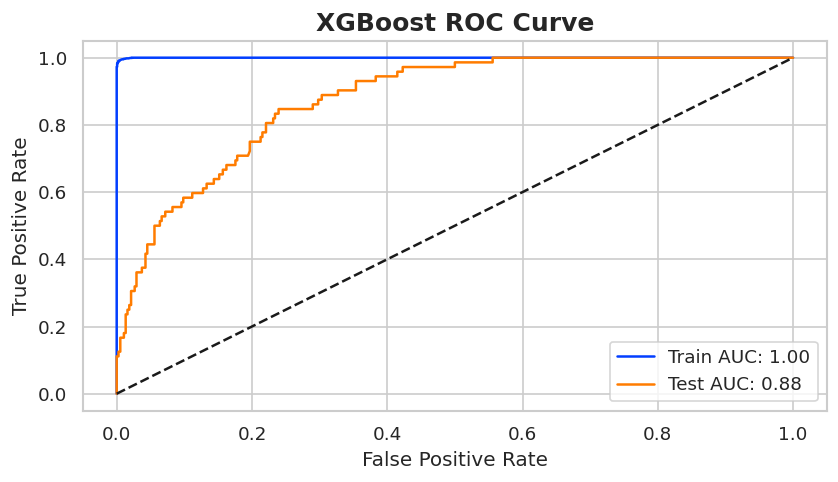

In [ ]:
from sklearn.metrics import roc_curve, auc
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 4), dpi=120)
plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve', fontweight='bold', fontsize=15)
plt.legend()
plt.show()

In [ ]:
df_rfm = df[['Recency', 'total_visits', 'total_spend_2_years', 'Income']]
df_rfm = df_rfm.rename(columns={'Recency':'R', 'total_visits':'F', 'total_spend_2_years':'M', 'Income':'I'})
df_rfm

R   F     M        I
0      0  16  1190  84835.0
1      0  23   577  57091.0
2      0  13   251  67267.0
3      0  11    11  32474.0
4      0  15    91  21474.0
...   ..  ..   ...      ...
2235  99  24   689  66476.0
2236  99  13    55  31056.0
2237  99  22   309  46310.0
2238  99  23  1383  65819.0
2239  99  25  1078  94871.0

[2240 rows x 4 columns]

In [ ]:
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_rfm.copy()
sc = StandardScaler()

# Fit the preprocessing pipeline on the data
X_preprocessed = sc.fit_transform(X)

# Use the elbow method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
range_values = range(2, 30)

for i in tqdm(range_values, "kmeans..."):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X_preprocessed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))


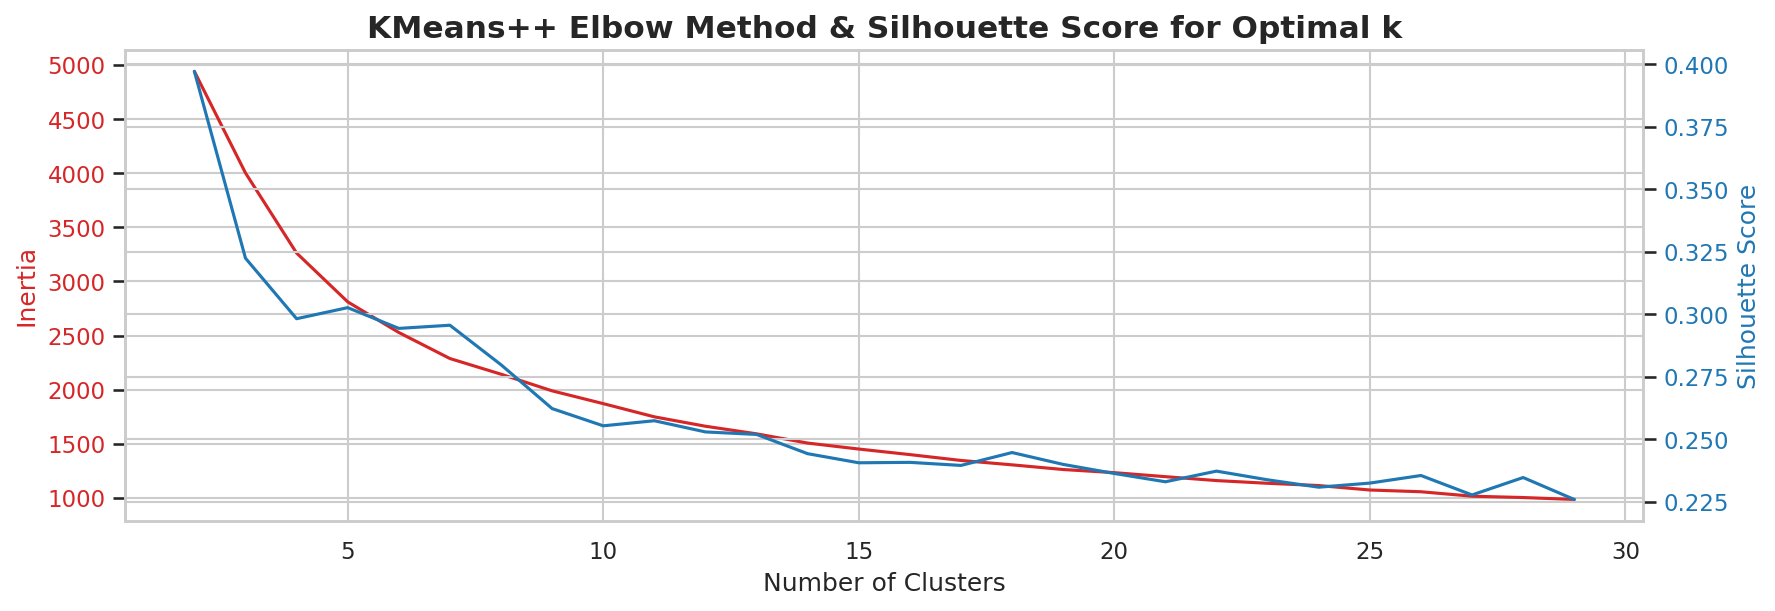

In [ ]:
# Plotting the Elbow Method graph
fig, ax1 = plt.subplots(figsize=(12,4),dpi=150)

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(range_values, inertia, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range_values, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('KMeans++ Elbow Method & Silhouette Score for Optimal k', fontweight='bold', fontsize=15)
plt.show()


In [ ]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42).fit(X_preprocessed)
df_cluster = df_rfm.copy()
df_cluster['cluster'] = np.array(kmeans.labels_)
df_cluster

R   F     M        I  cluster
0      0  16  1190  84835.0        4
1      0  23   577  57091.0        6
2      0  13   251  67267.0        6
3      0  11    11  32474.0        0
4      0  15    91  21474.0        0
...   ..  ..   ...      ...      ...
2235  99  24   689  66476.0        5
2236  99  13    55  31056.0        2
2237  99  22   309  46310.0        5
2238  99  23  1383  65819.0        3
2239  99  25  1078  94871.0        3

[2240 rows x 5 columns]

Cluster number ordered by conversion rate asc [2, 7, 9, 5, 1, 6, 0, 8, 3, 4]


Response    0   1  conversion_rate
cluster                           
2         321   8         0.024316
7         290  20         0.064516
9         133  10         0.069930
5         186  14         0.070000
1         173  26         0.130653
6         184  35         0.159817
0         252  52         0.171053
8         145  41         0.220430
3         118  46         0.280488
4         104  82         0.440860

<Figure size 960x720 with 0 Axes>

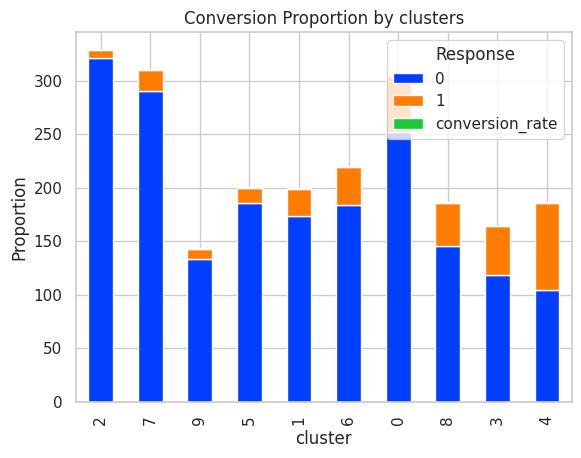

In [ ]:
crosstab = pd.crosstab(df_cluster['cluster'], df['Response'])
crosstab['conversion_rate'] = crosstab[1]/(crosstab[1]+crosstab[0])
crosstab = crosstab.sort_values('conversion_rate')
conversion_order = list(crosstab.index)
print("Cluster number ordered by conversion rate asc", conversion_order)
display(crosstab)
plt.figure(dpi=150)
crosstab.plot(kind='bar', stacked=True)
plt.title('Conversion Proportion by clusters')
plt.ylabel('Proportion')
plt.show()

In [ ]:
df_segment = df_cluster.groupby(['cluster']).mean()
df_segment
df_segment['I']/=1000
df_segment['F']*=2
df_segment['M']/=20
df_segment = df_segment.loc[conversion_order]
df_segment['conversion_rate'] = crosstab['conversion_rate']*200
df_segment

R          F          M          I  conversion_rate
cluster                                                             
2        82.775076  27.702128   4.436322  35.107156         4.863222
7        48.319355  27.264516   3.674194  32.332209        12.903226
9        69.580420  36.251748  49.475524  75.364816        13.986014
5        72.240000  48.100000  22.843000  49.373254        14.000000
1        68.467337  62.170854  51.046734  62.643514        26.130653
6        21.803653  44.611872  21.807991  52.440471        31.963470
0        15.378289  26.993421   3.817270  33.200480        34.210526
8        21.494624  61.118280  50.180108  66.142104        44.086022
3        75.371951  49.256098  85.105793  80.032668        56.097561
4        21.295699  44.279570  76.460753  80.027231        88.172043

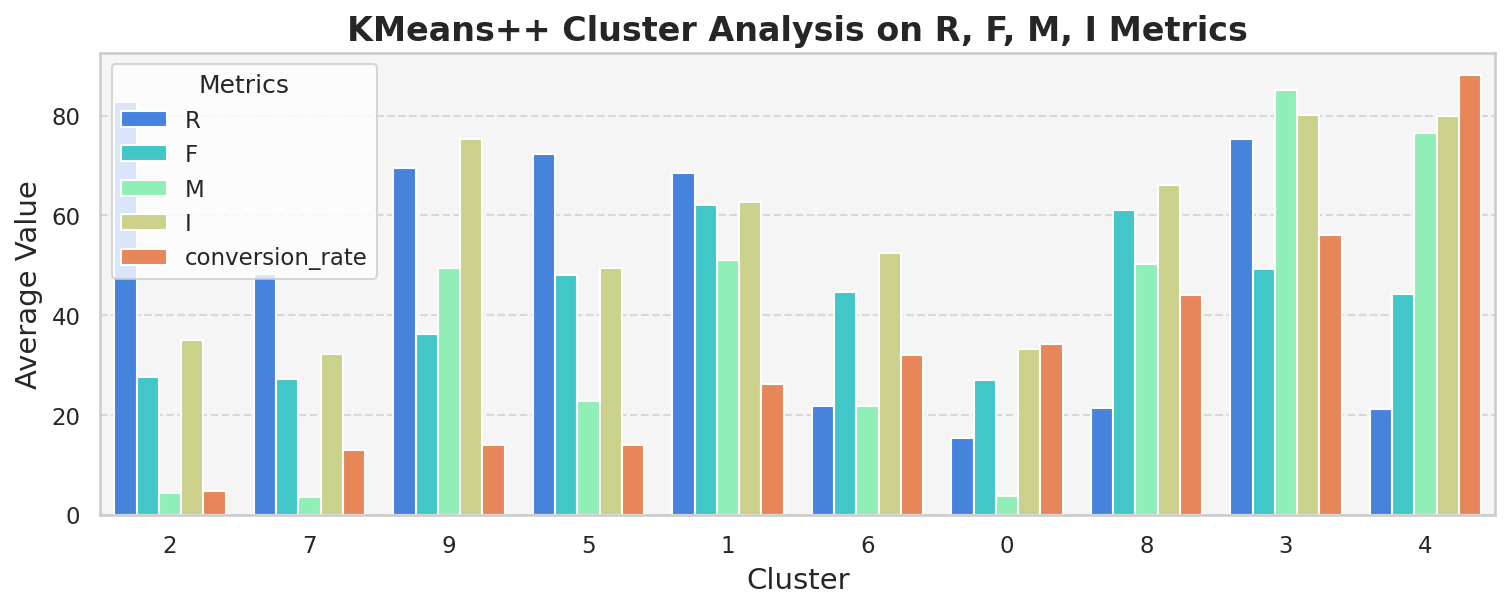

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=150)
sns.barplot(data=df_segment.reset_index().melt(id_vars='cluster'), x='cluster', y='value', hue='variable', palette='rainbow', order=conversion_order)

# Customize the plot
ax.set_title('KMeans++ Cluster Analysis on R, F, M, I Metrics', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Average Value', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('whitesmoke')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

plt.show()

In [ ]:
crosstab

Response    0   1  conversion_rate
cluster                           
2         321   8         0.024316
7         290  20         0.064516
9         133  10         0.069930
5         186  14         0.070000
1         173  26         0.130653
6         184  35         0.159817
0         252  52         0.171053
8         145  41         0.220430
3         118  46         0.280488
4         104  82         0.440860

array([82.77507599, 27.70212766,  4.43632219, 35.10715588,  4.86322188,
       82.77507599])

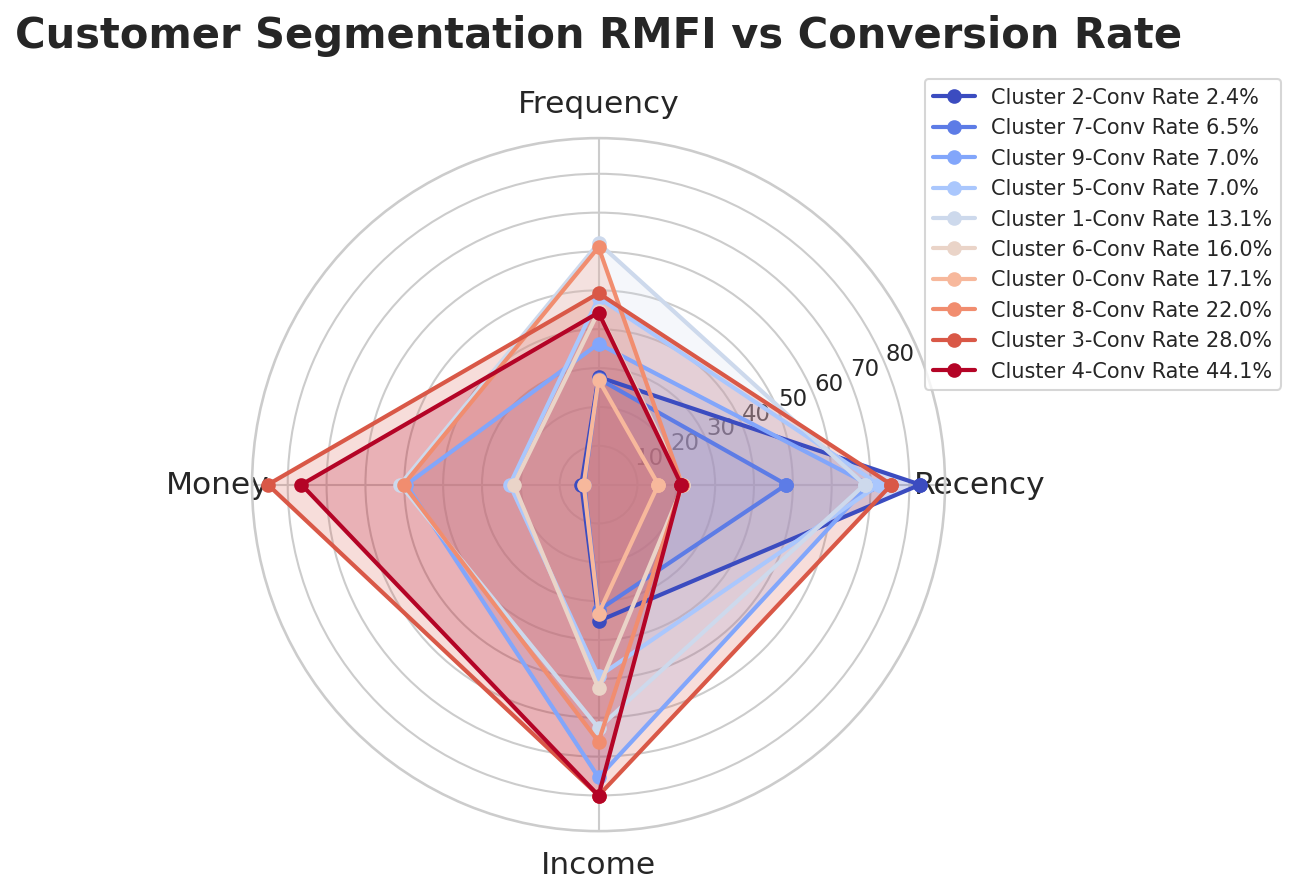

In [ ]:
import matplotlib.cm as cm

num_colors = n_clusters

number = list(range(n_clusters))
colors = cm.coolwarm(np.linspace(0, 1, num_colors) )


fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(111, polar=True)
features = ["Recency", "Frequency", "Money", "Income"]
N = len(features)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

ax.set_thetagrids(np.degrees(angles[:-1]), features, fontsize=15)

# Plotting with the colors generated from 'coolwarm'
for i, v in enumerate(df_segment.values):
    row = v[:-1]
    values = [*row, row[0]]  # Close the radar loop

    cluster = crosstab.index[i]
    conv_rate = crosstab.loc[cluster]['conversion_rate'] *100
    # print(cluster, conv_rate)
    ax.plot(angles, values, 'o-', linewidth=2, label=f"Cluster {cluster}-Conv Rate {round(conv_rate,1)}%", color=colors[i])
    ax.fill(angles, values, alpha=0.2, color=colors[i])

plt.title('Customer Segmentation RMFI vs Conversion Rate', fontsize=20, pad=20, fontweight='bold')
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1), fontsize=10)

plt.show()
